In [2]:
# load base packages
import pandas as pd
import pyodbc
import re
import numpy as np
# Set random seed
np.random.seed(0)

# import our visualization libs
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib as mpl
#visualization settings
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Import Pickled Data

In [5]:
dfimpalaProd = pd.read_pickle(r'data/deposit_data_consensed.pkl')
dfimpalaProd.dropna(axis = 0, how ='any', inplace=True)
dfimpalaProd.head()

,party_key,person_age,male,female,account_age_days,closed_within_next_month,account_key,trans_count_total_1,trans_count_total_dif,trans_count_deposits_1,...,transaction_amt_transfers_2,transaction_amt_fees_2,transaction_amt_misc_2,trans_post_ledger_bal_amt_2,trans_post_ledger_bal_amt_deposits_2,trans_post_ledger_bal_amt_purchases_payments_2,trans_post_ledger_bal_amt_withdrawals_2,trans_post_ledger_bal_amt_transfers_2,trans_post_ledger_bal_amt_fees_2,trans_post_ledger_bal_amt_misc_2
0,46531765,49.106849,1,0,90,1,45269591,128,-8,5,...,0.0,0.056818,0.830720,198.093521,14.256288,157.188217,14.905378,0.0,5.370076,3.113864
1,47165428,60.095890,1,0,120,1,45047095,1,-4,0,...,0.0,0.000000,0.000000,1480.333374,0.000000,0.000000,1174.333374,0.0,0.000000,0.000000
2,37451305,32.739726,0,0,1084,1,37156147,5,0,3,...,0.0,0.000000,0.000000,52.500000,31.000000,0.000000,21.500000,0.0,0.000000,0.000000
3,46542092,69.550685,1,0,195,1,44386125,1,-1,0,...,0.0,0.000000,0.043333,5201.096680,0.000000,2600.526611,0.000000,0.0,0.000000,2600.570068
4,39019005,89.726027,1,0,4221,1,35940050,11,-2,1,...,0.0,0.412500,0.014167,24166.349609,1879.345459,9264.235352,7461.556152,0.0,3707.396240,1853.815430


### Check Percent of Closed Accounts

In [40]:
label_col = 'closed_within_next_month'
dfimpalaProd['closed_within_next_month'].mean()

0.005355429158039286

In [7]:
df_clean = dfimpalaProd.drop(['party_key','account_key'], axis = 1)

In [8]:
def remove_label(col_list, label_name):
    feat_cols = [col for col in df_clean.columns if col != label_name]
    return feat_cols

In [41]:
feat_cols = remove_label(df_clean.columns, label_col)

In [45]:
def create_dists(df, feat_cols, label_name):
    for feat in feat_cols:
        g = sns.FacetGrid(df, hue=label_name, height=8, aspect=2)
        g = g.map(sns.distplot, feat, kde=True).add_legend()

C:\Program Files\Anaconda3\envs\_tf\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Program Files\Anaconda3\envs\_tf\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


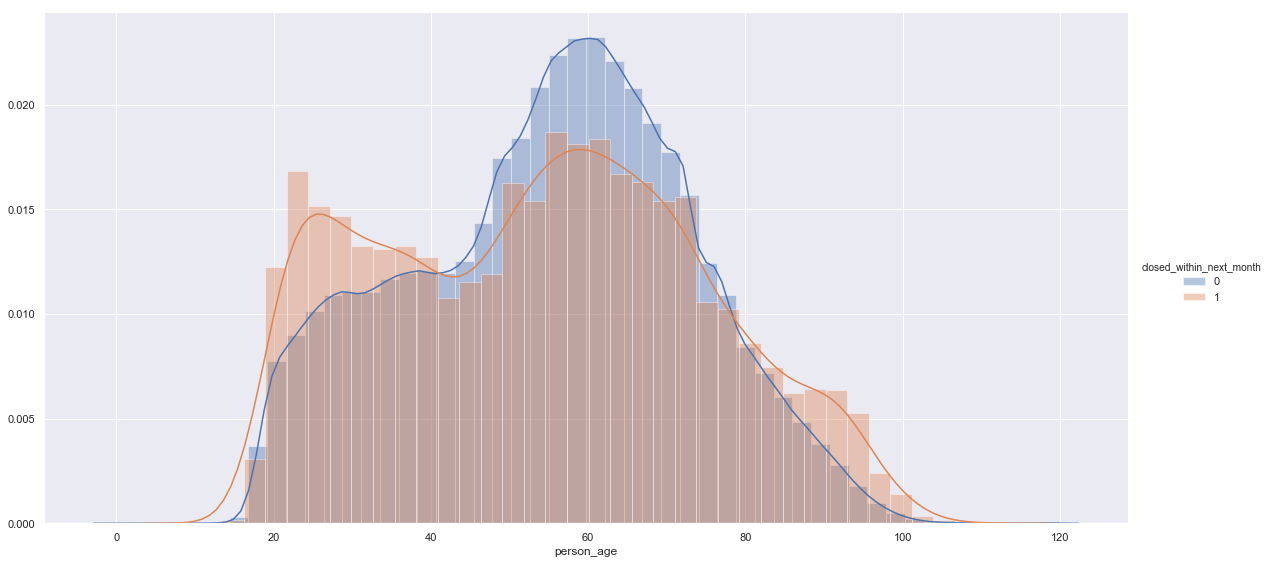

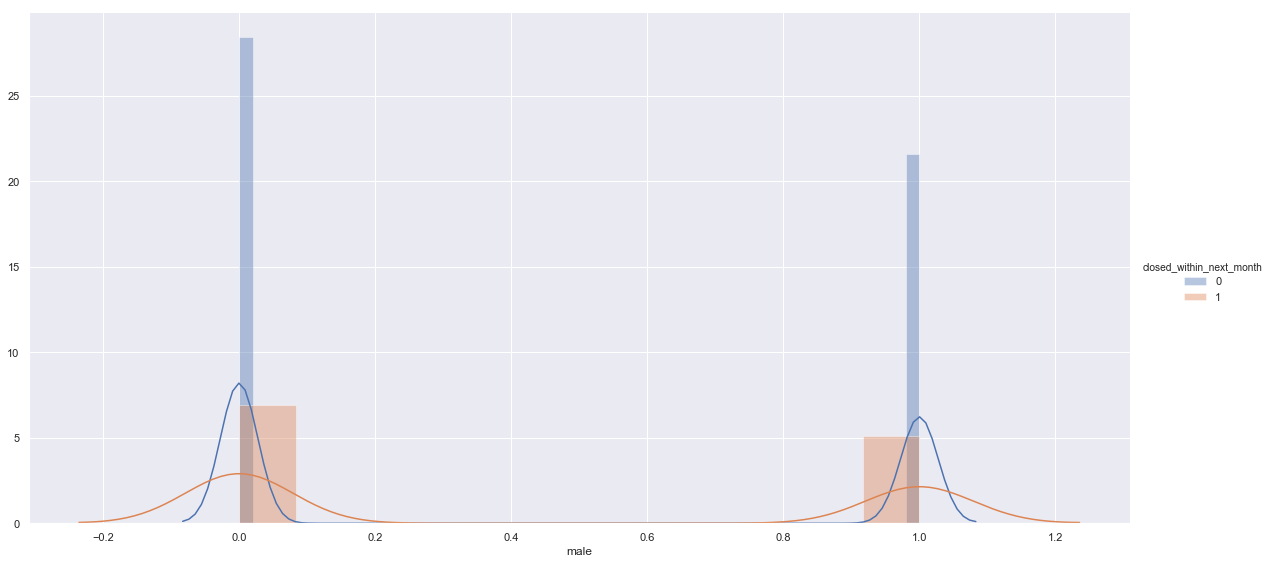

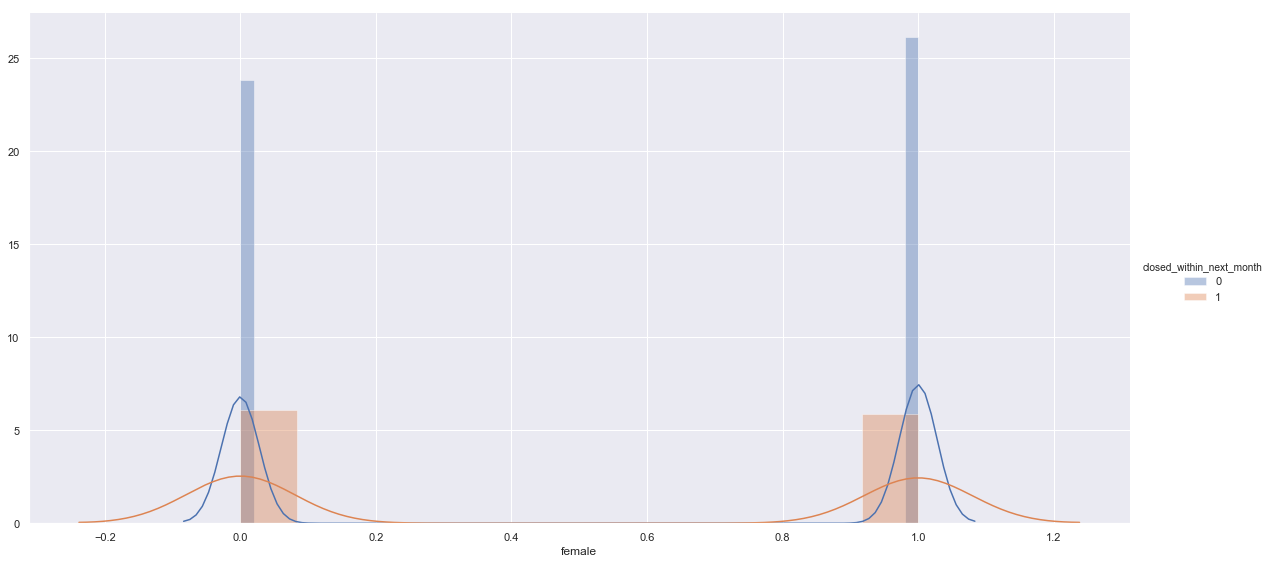

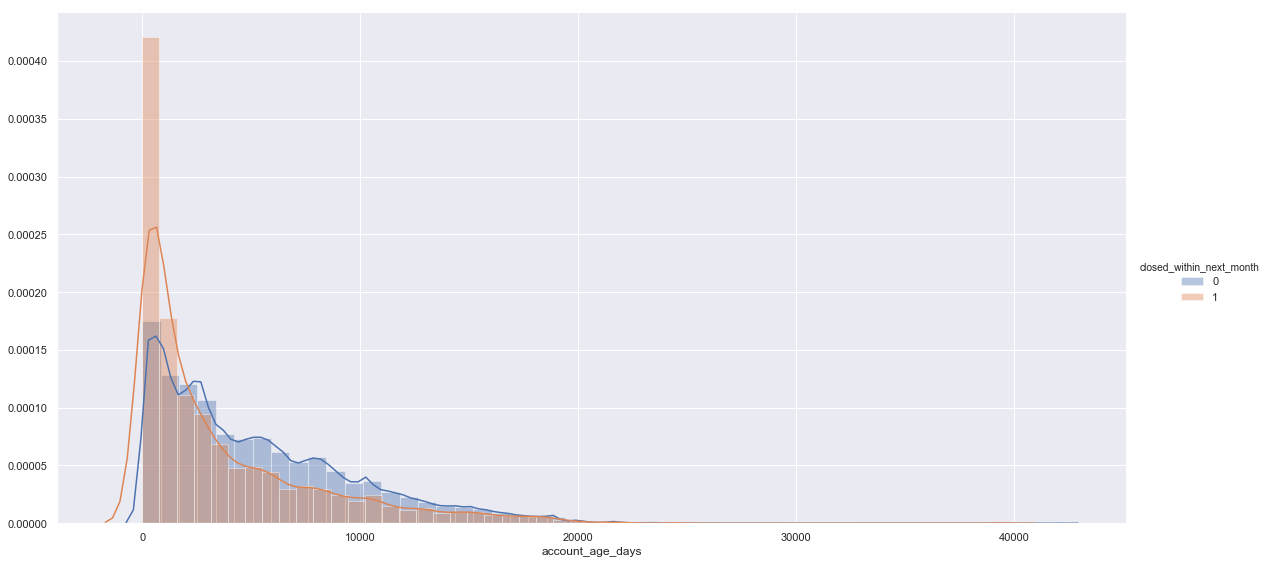

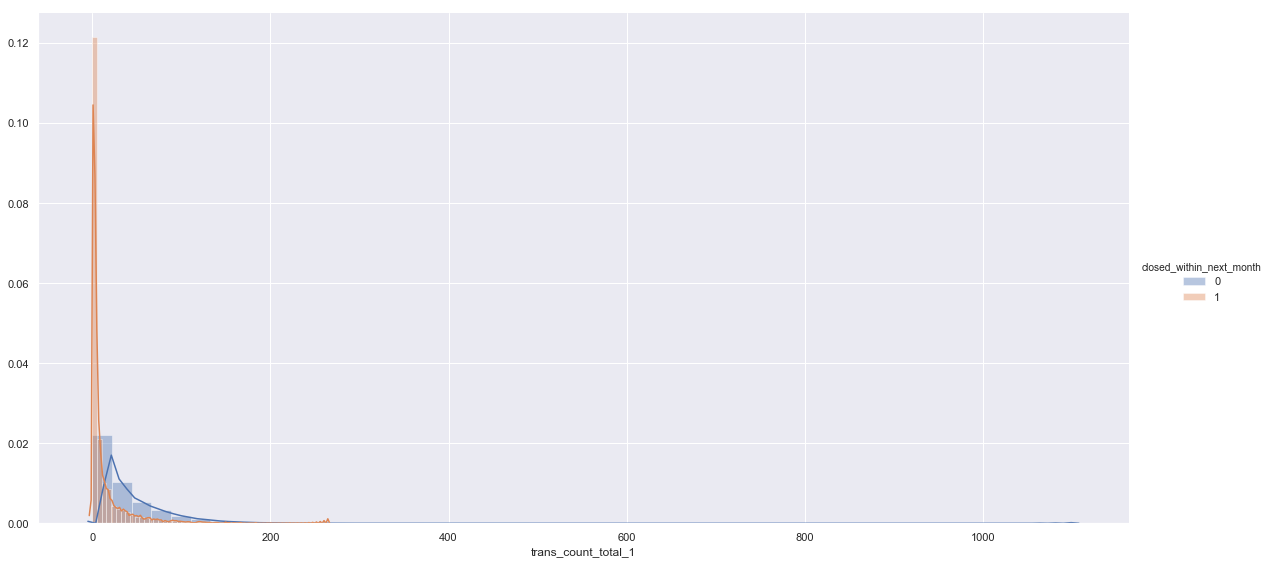

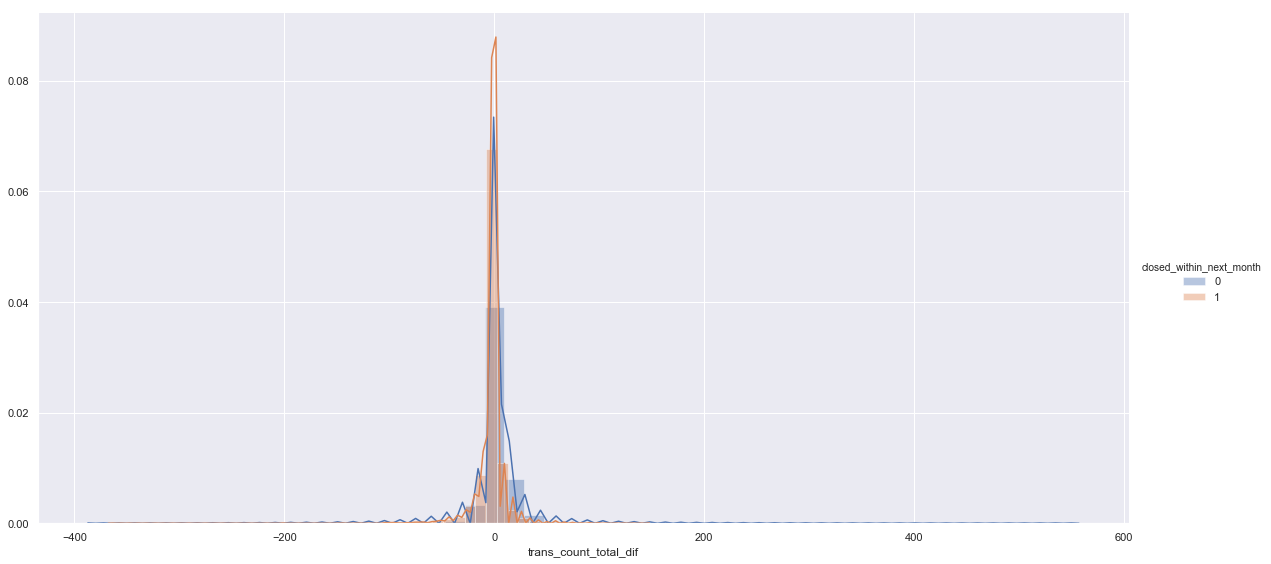

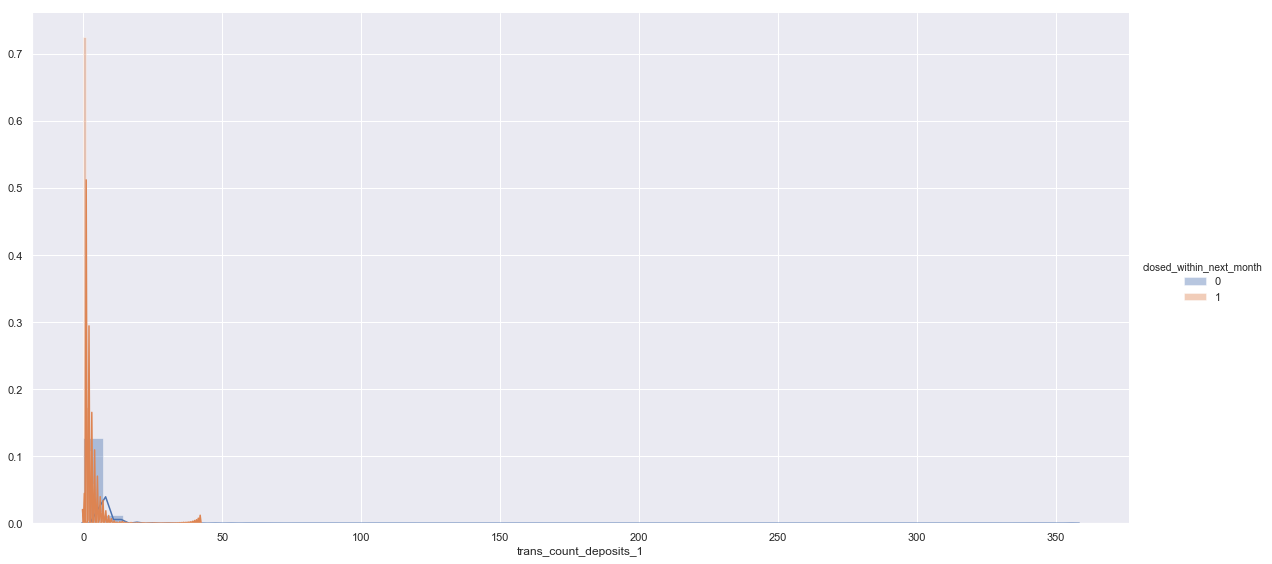

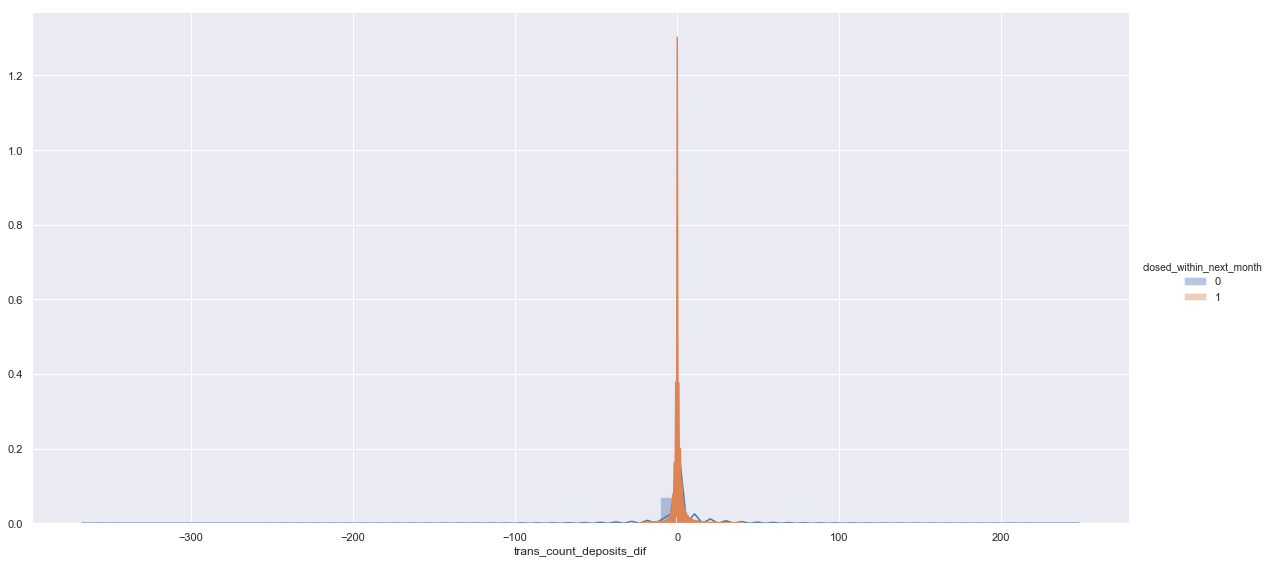

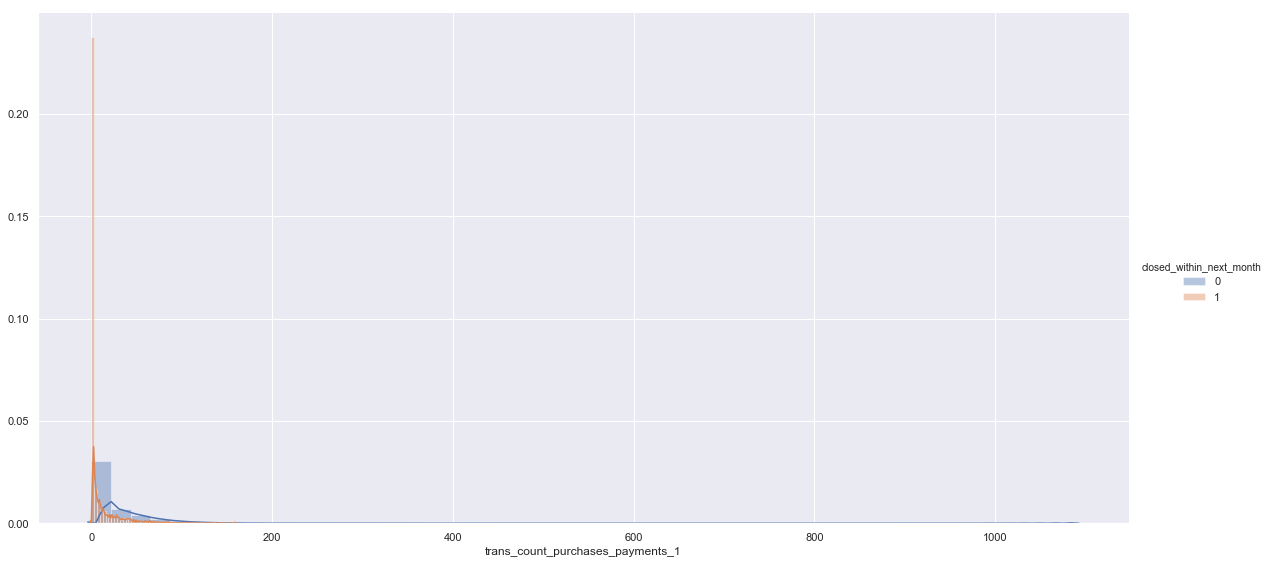

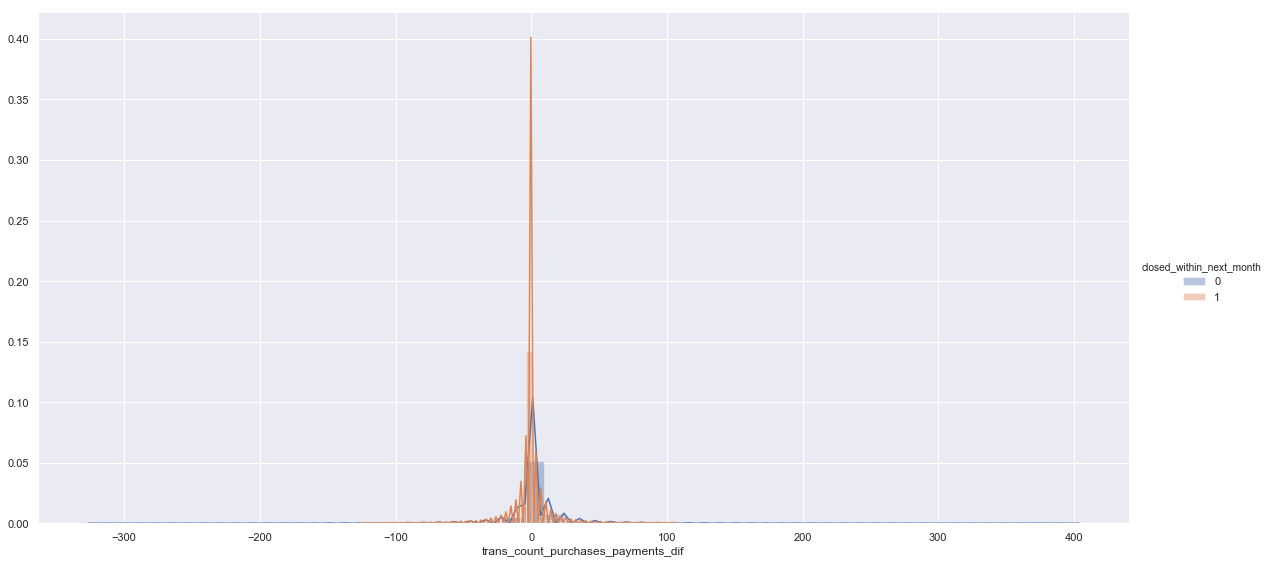

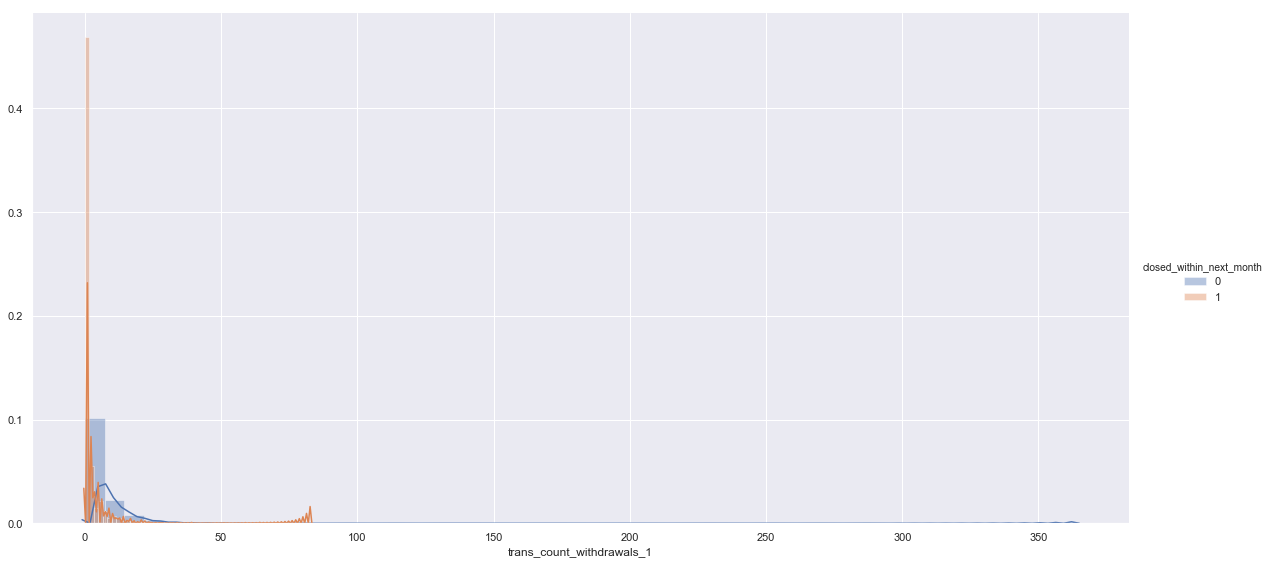

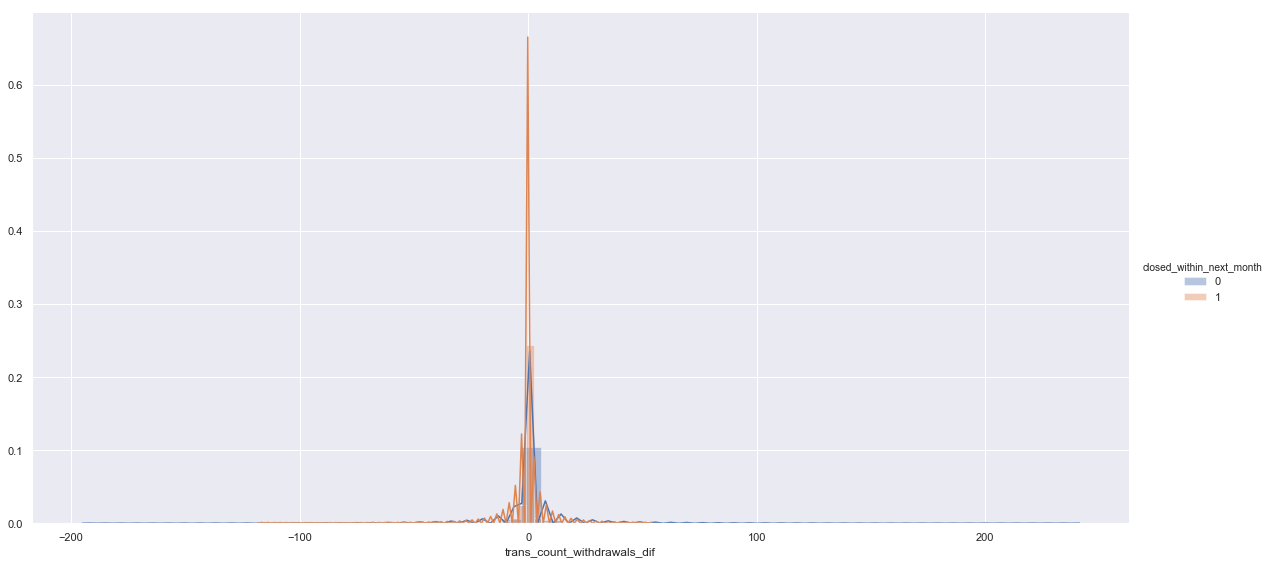

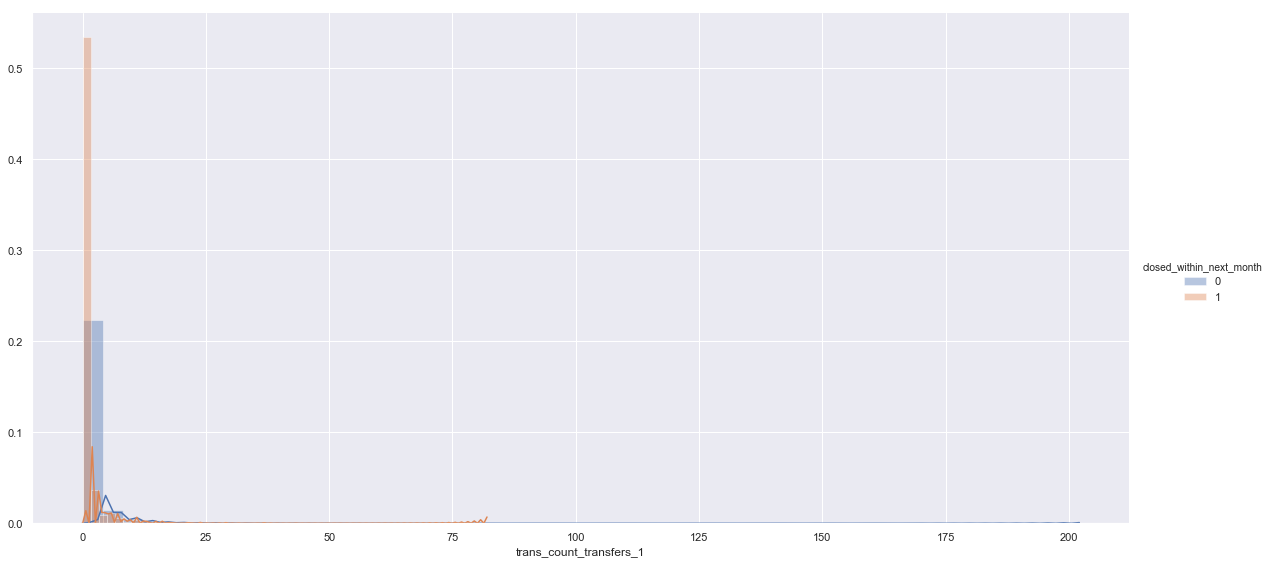

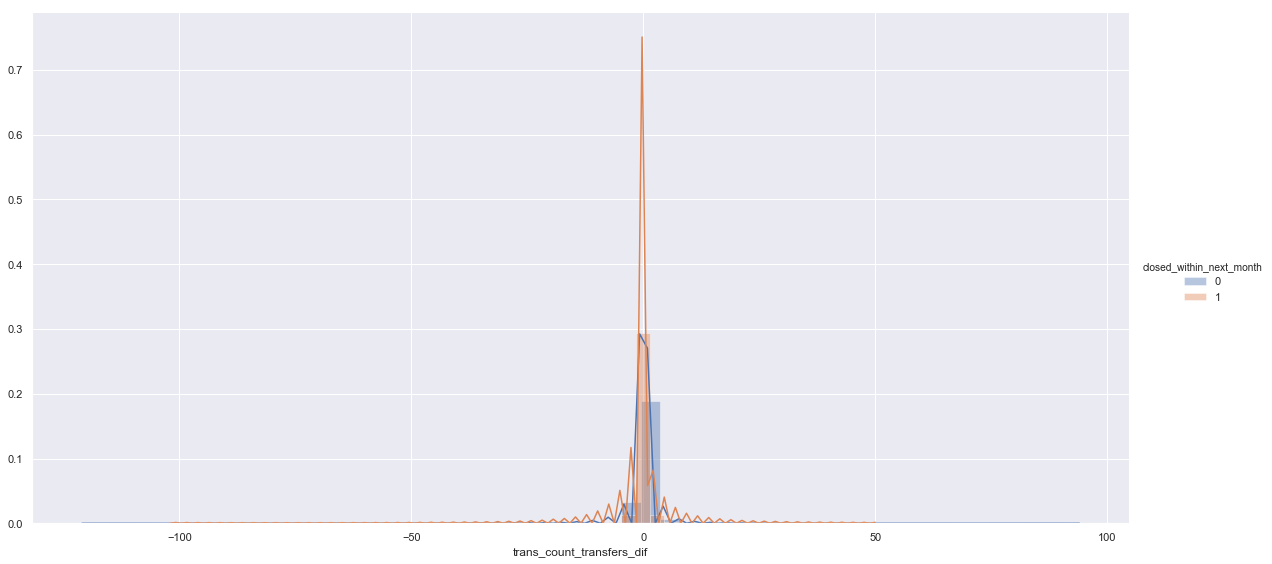

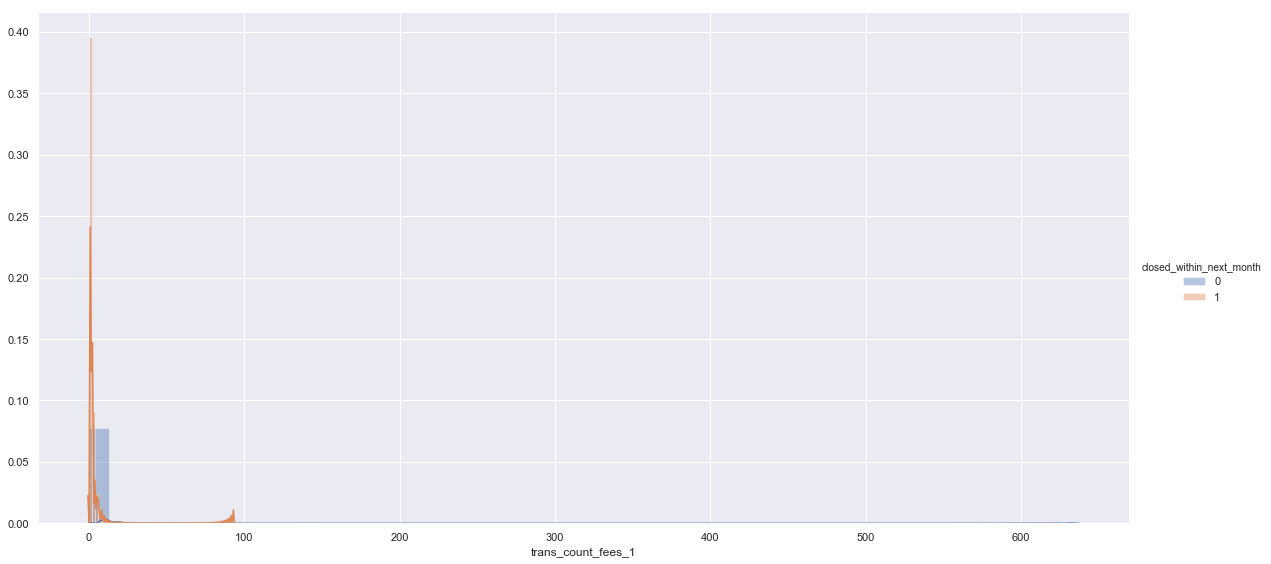

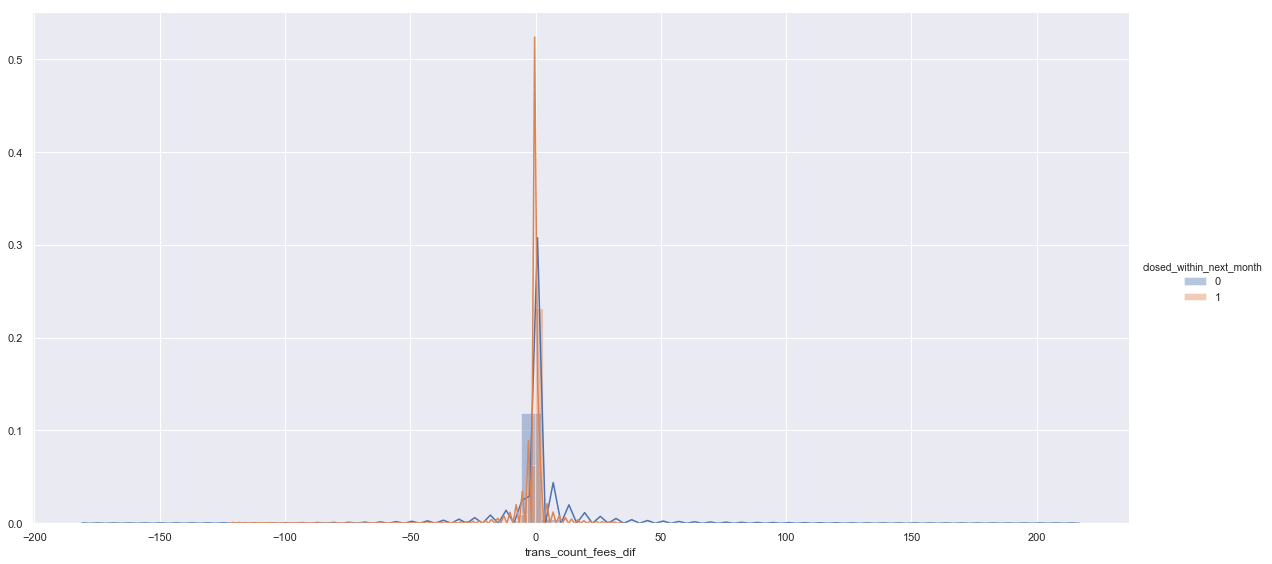

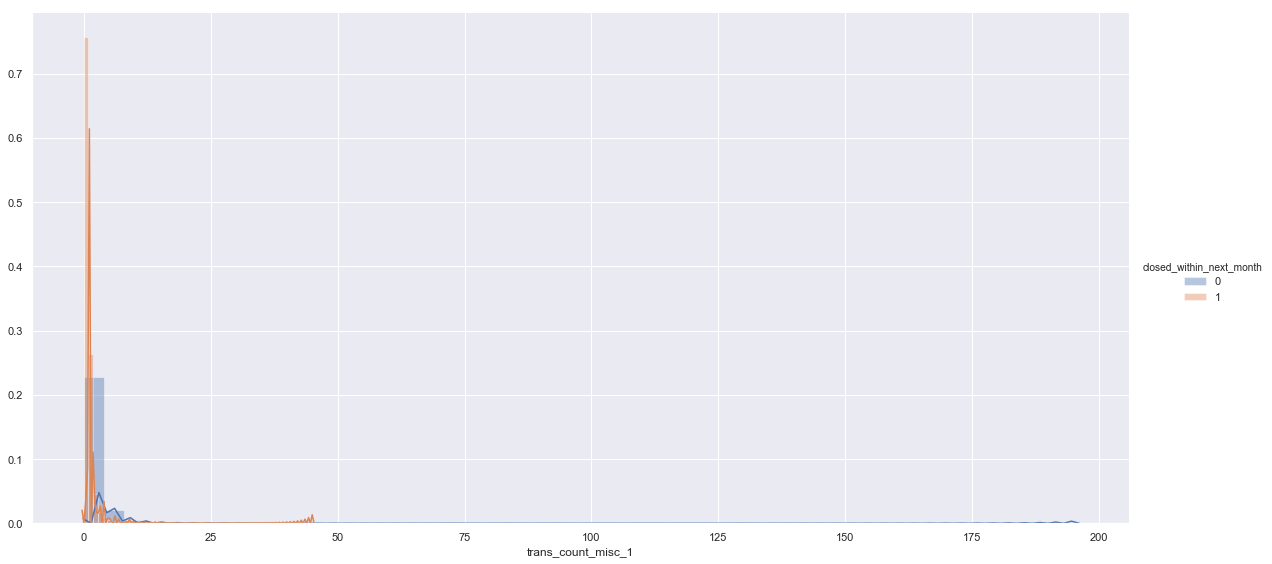

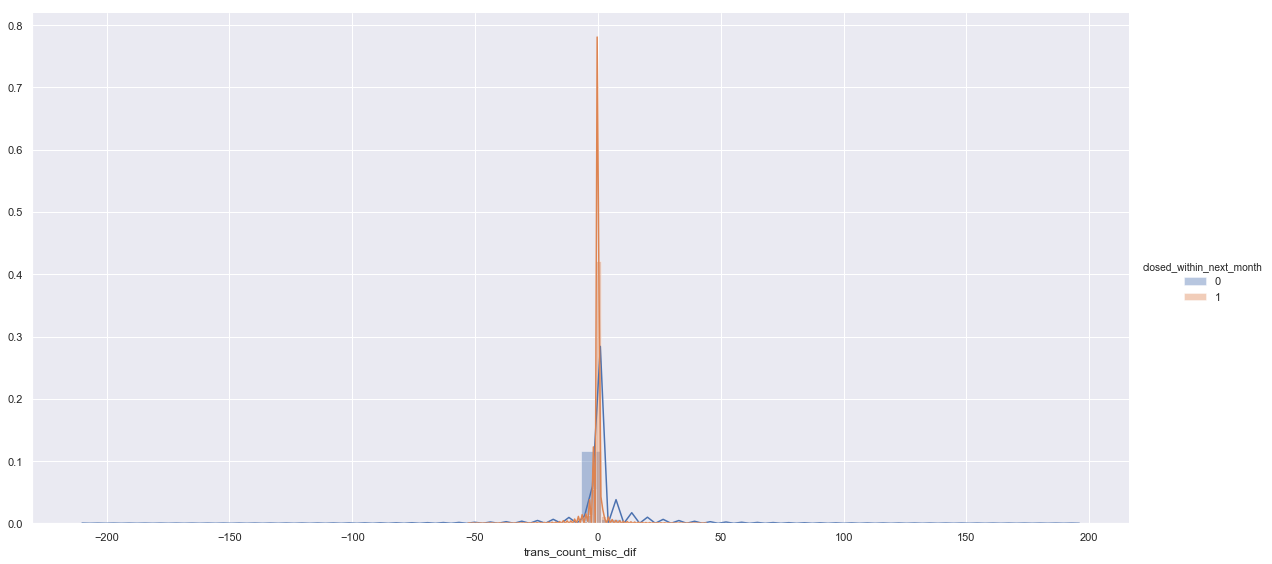

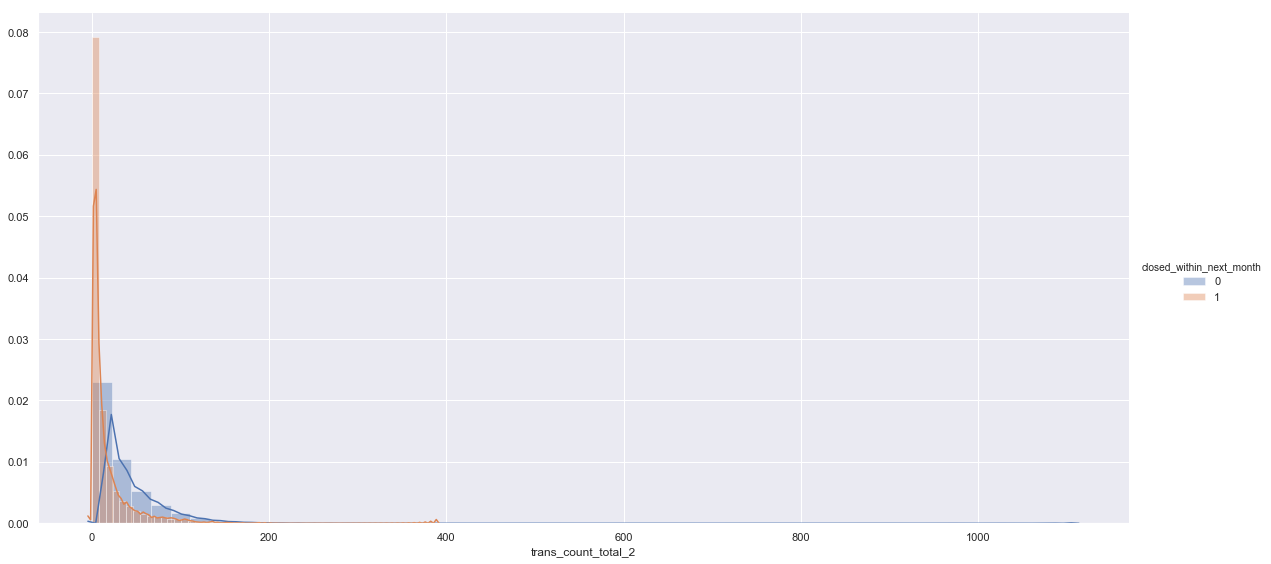

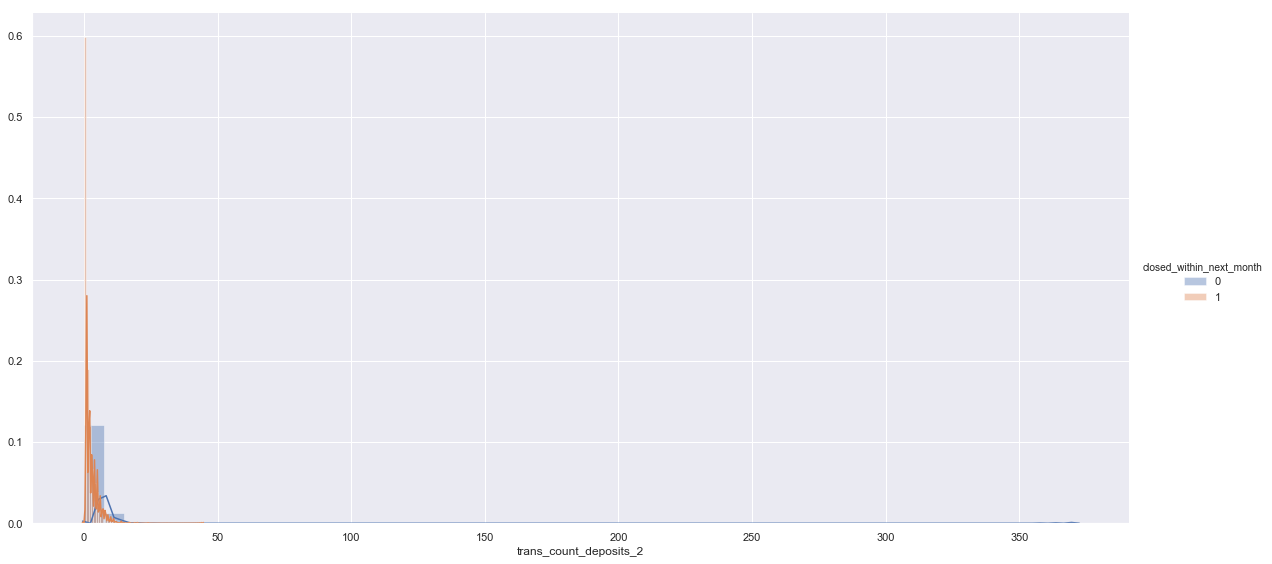

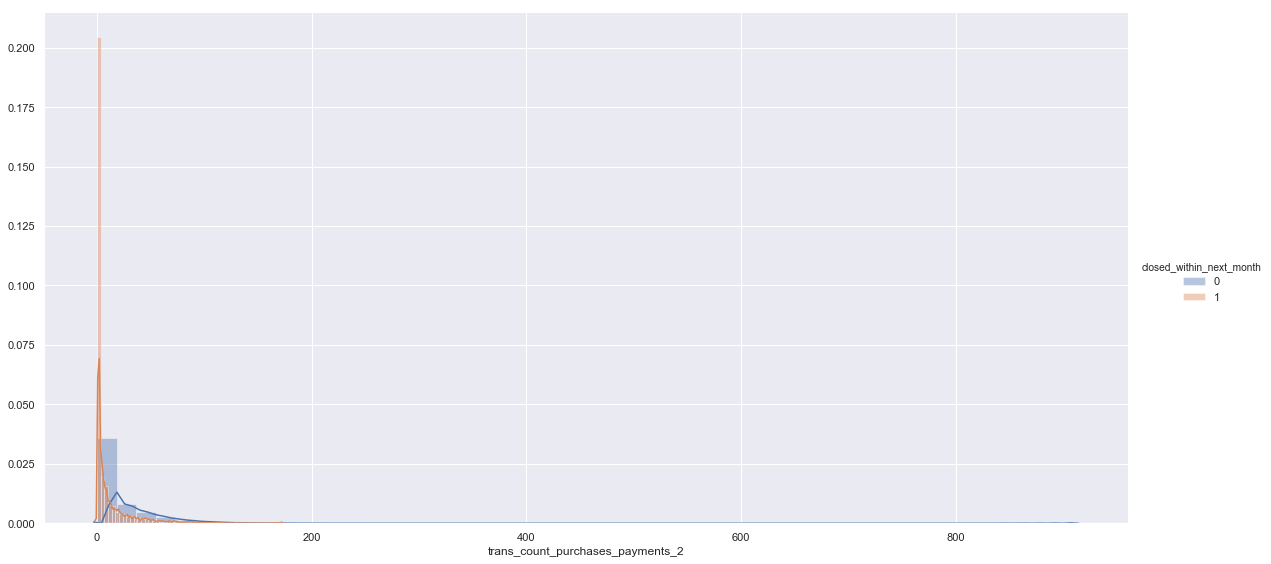

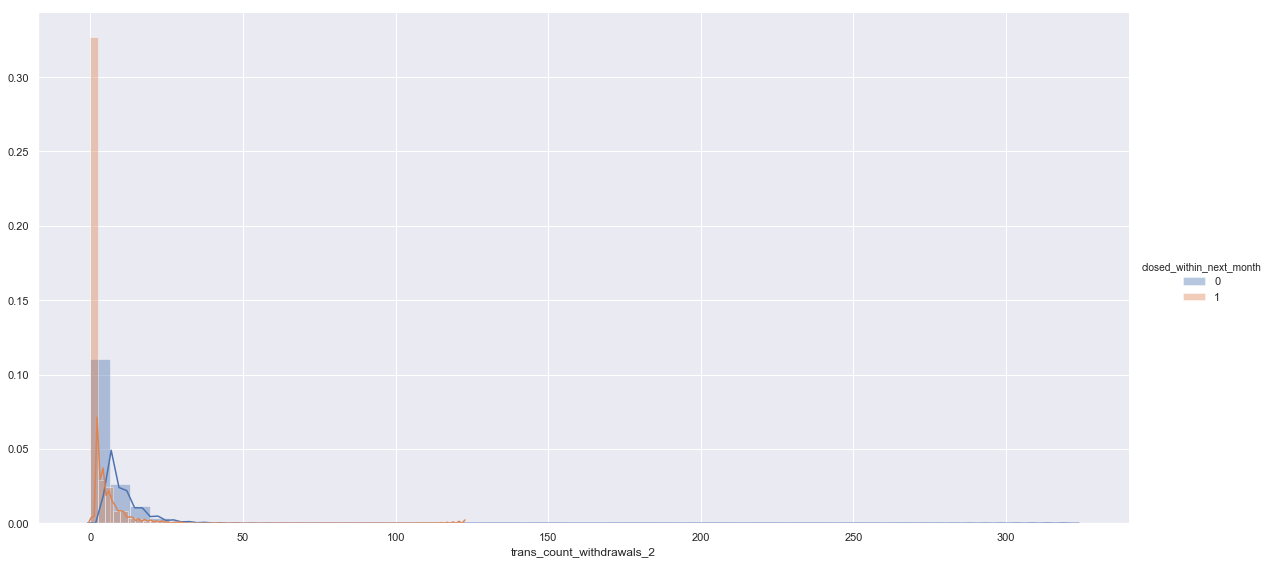

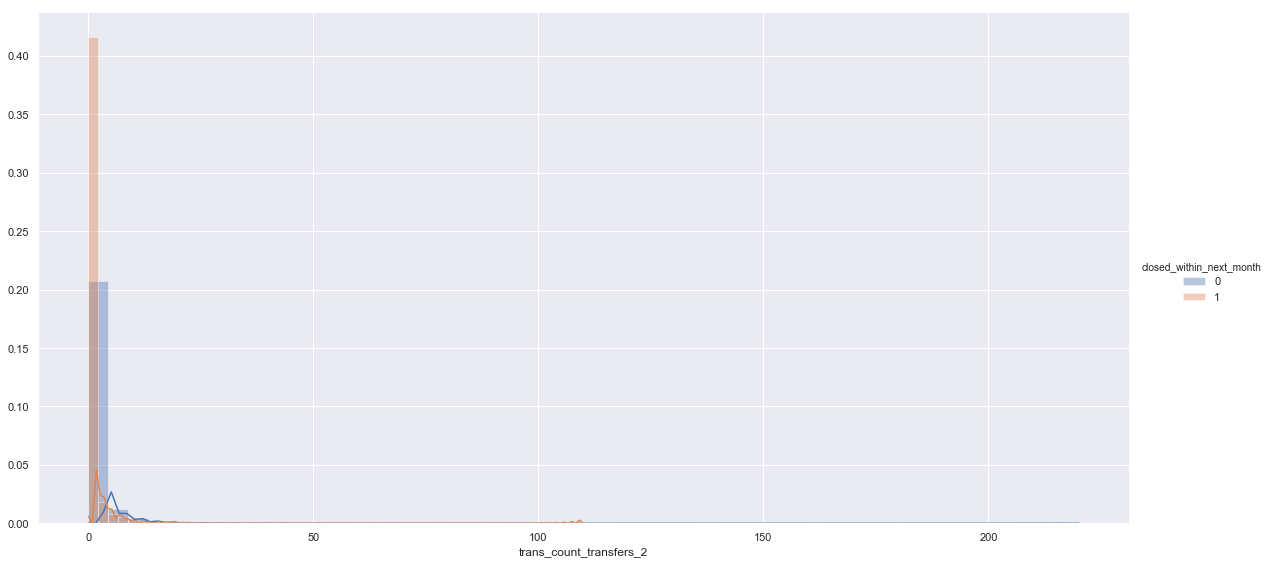

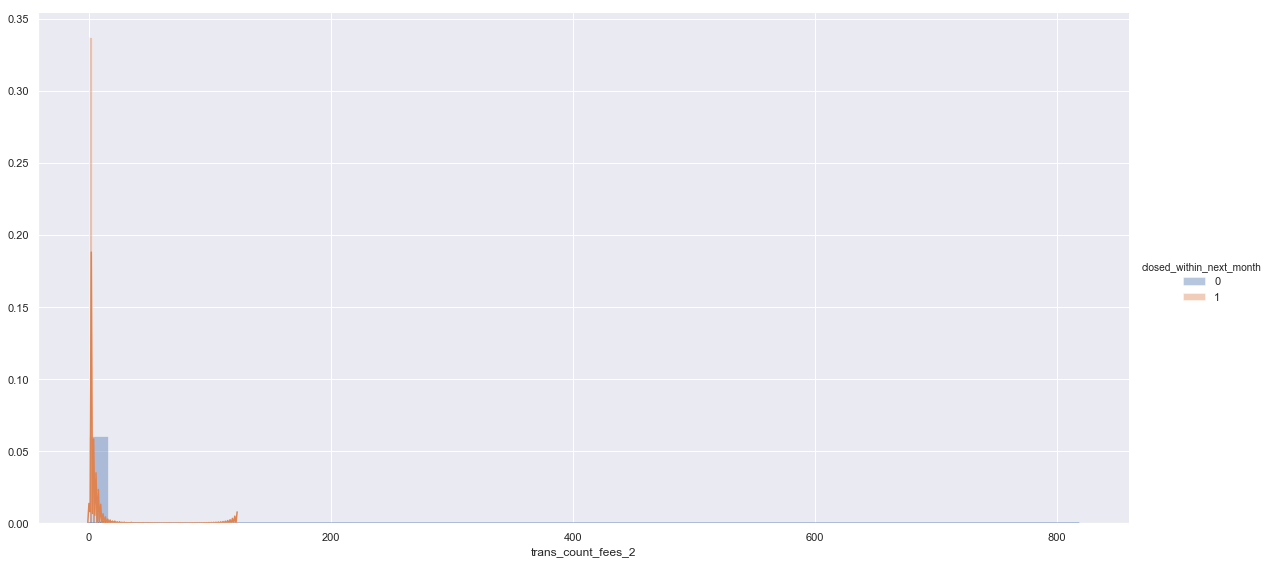

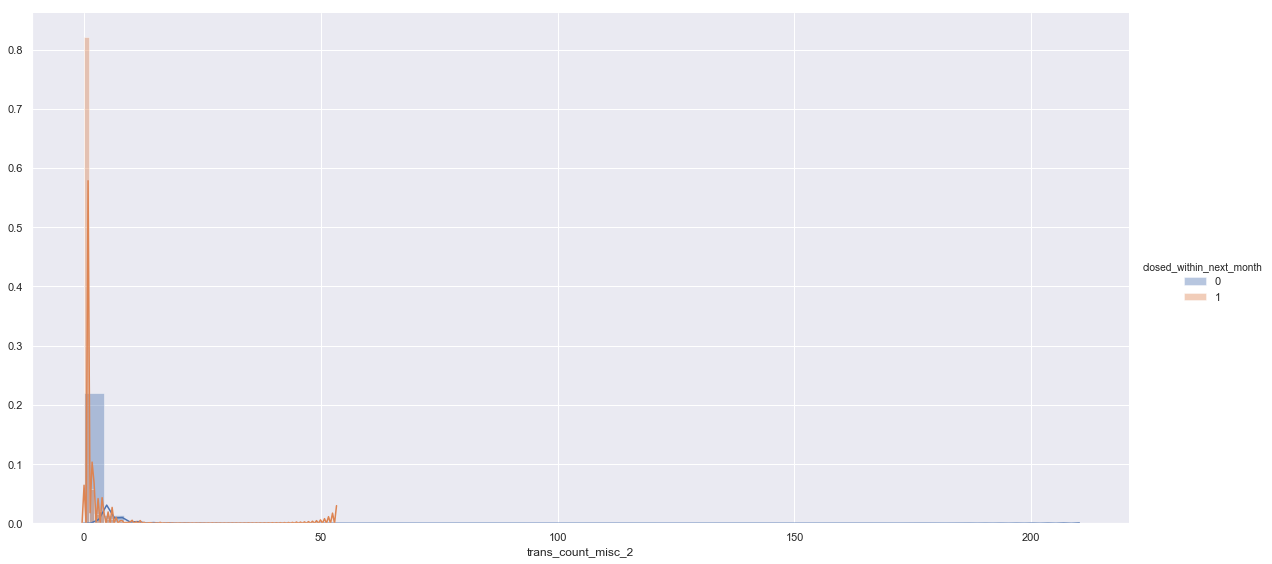

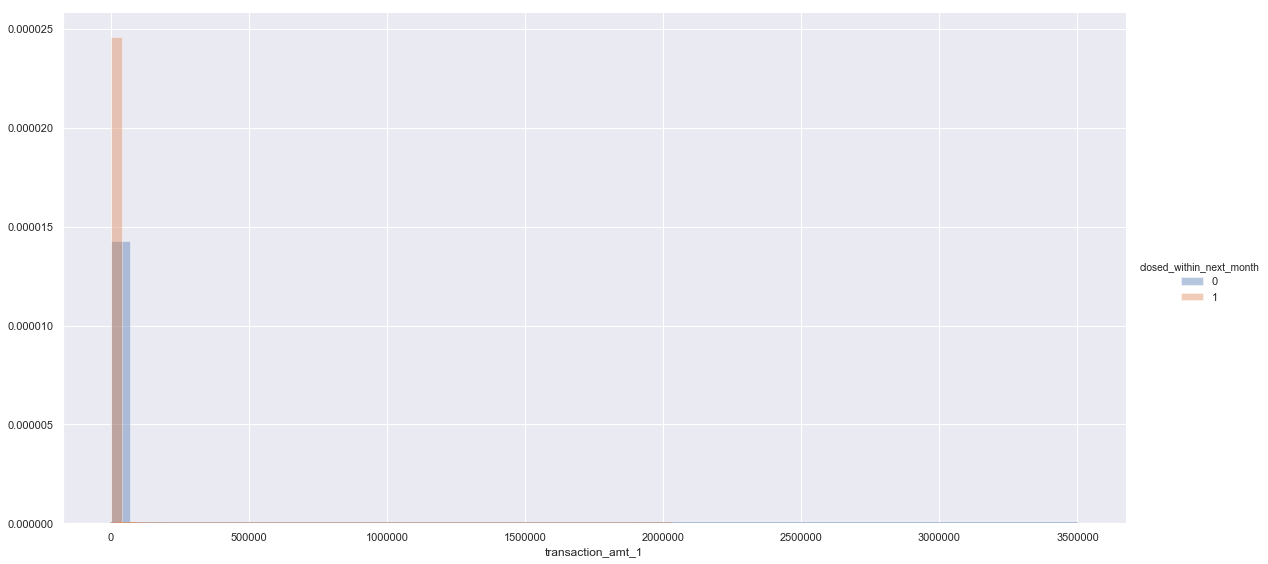

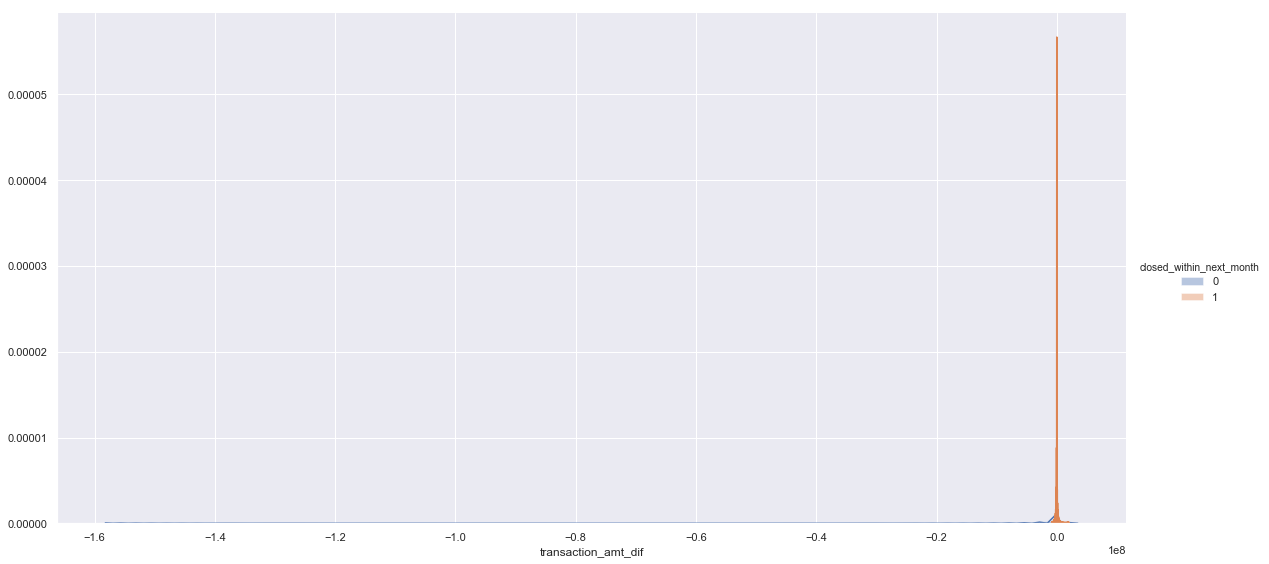

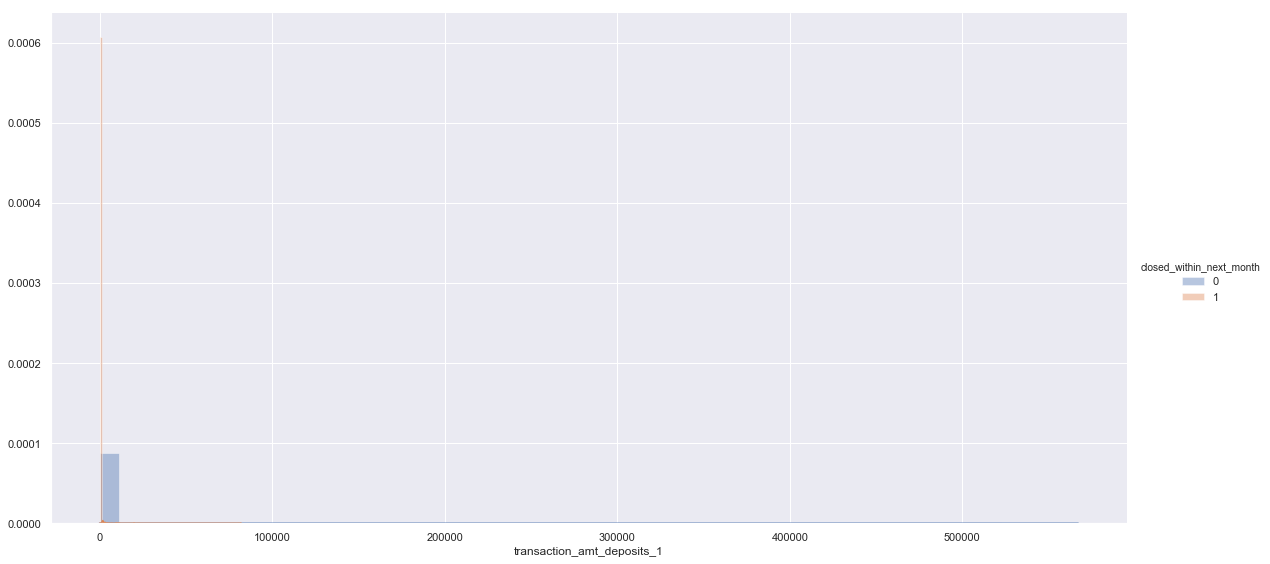

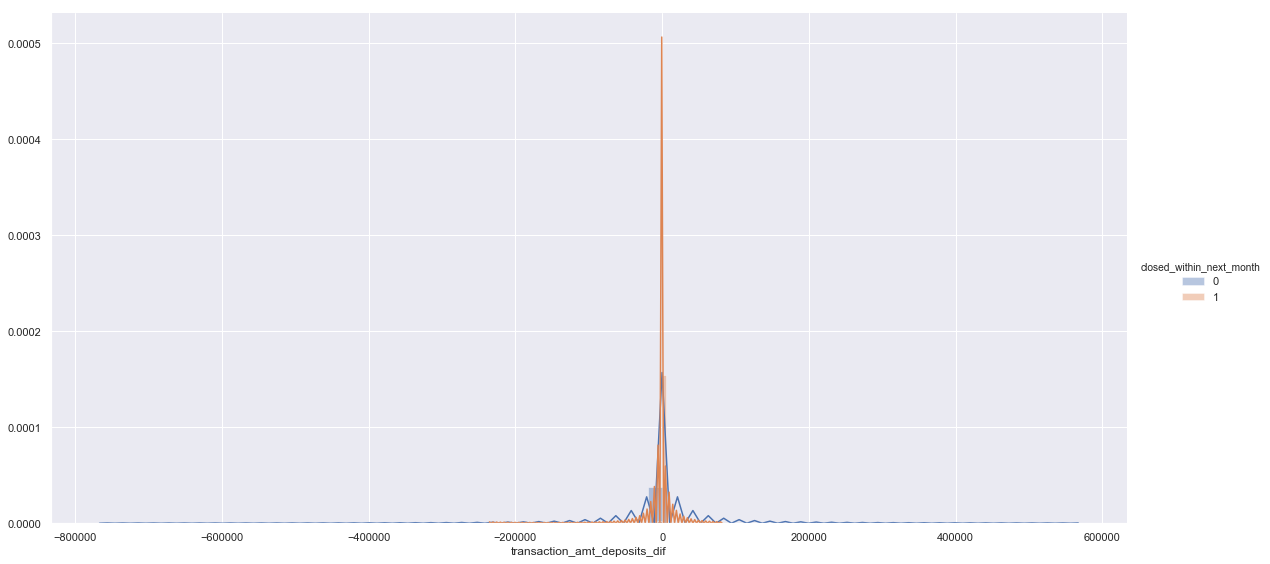

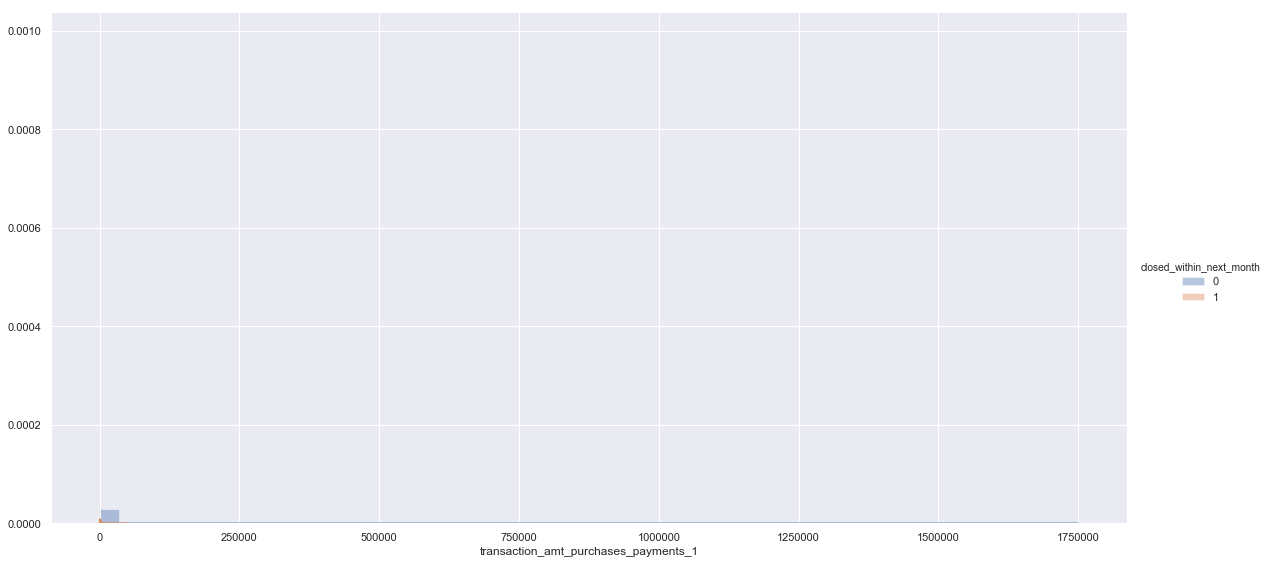

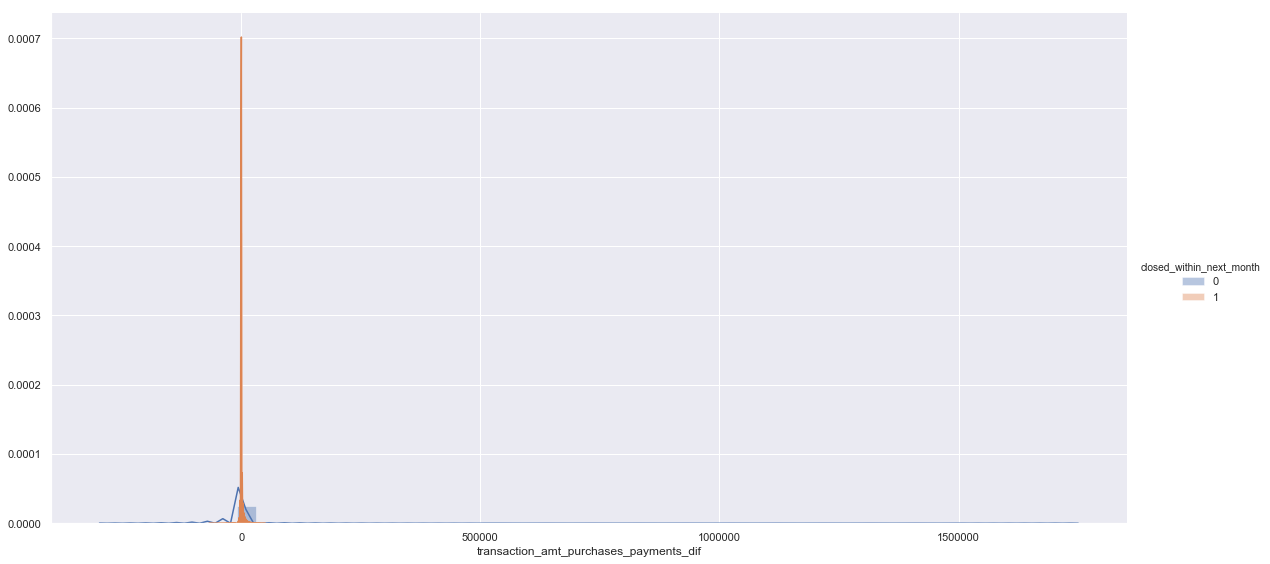

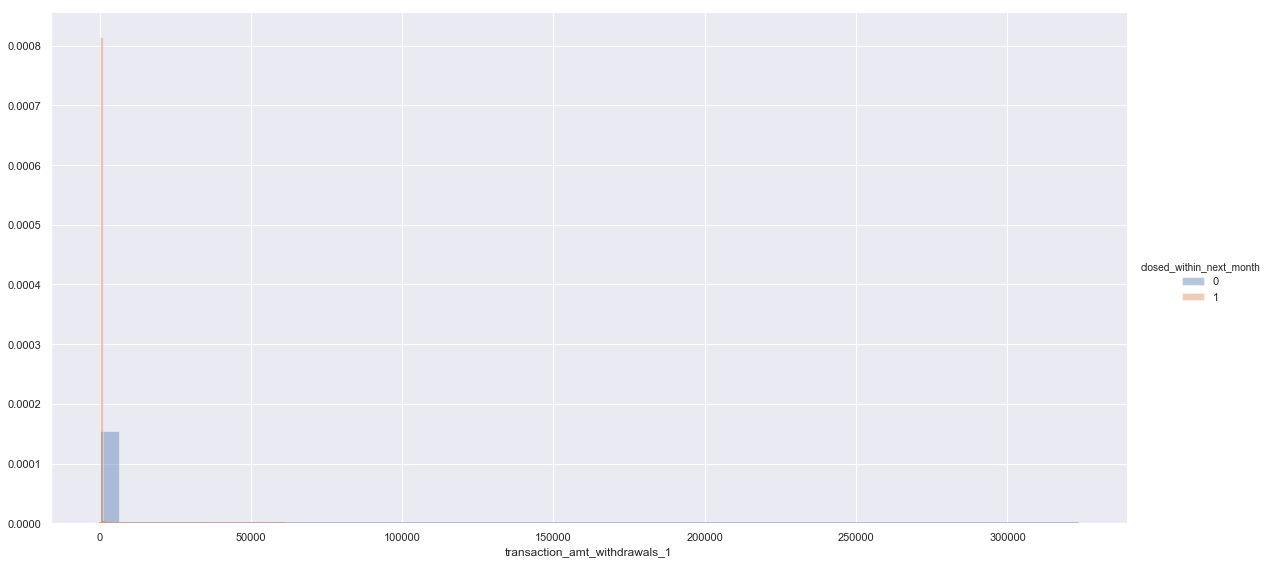

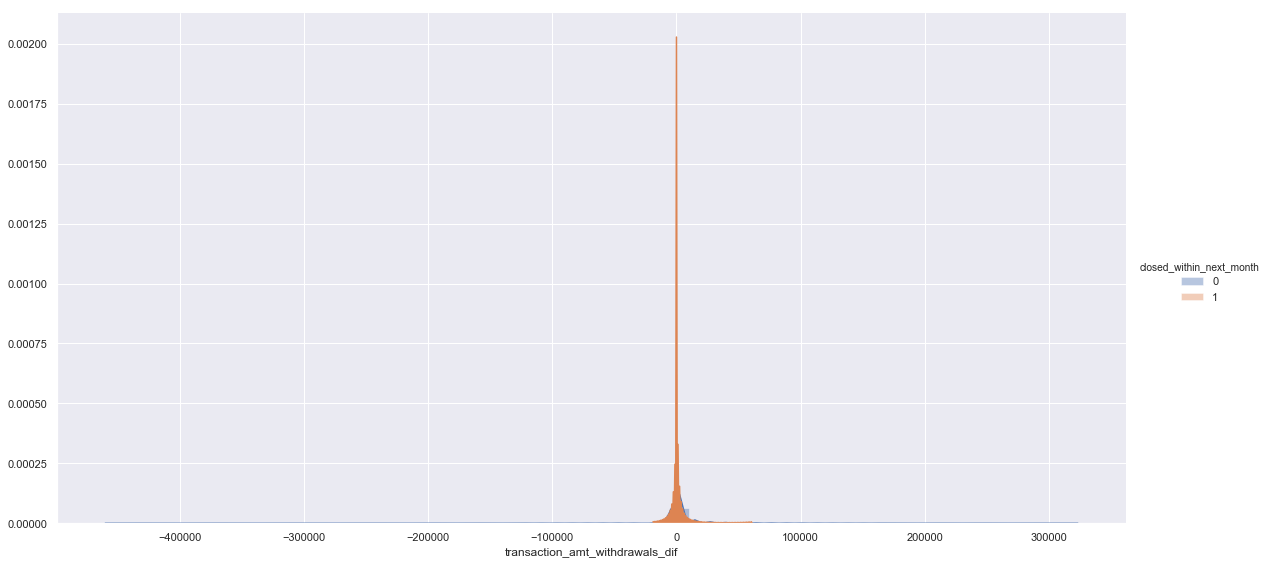

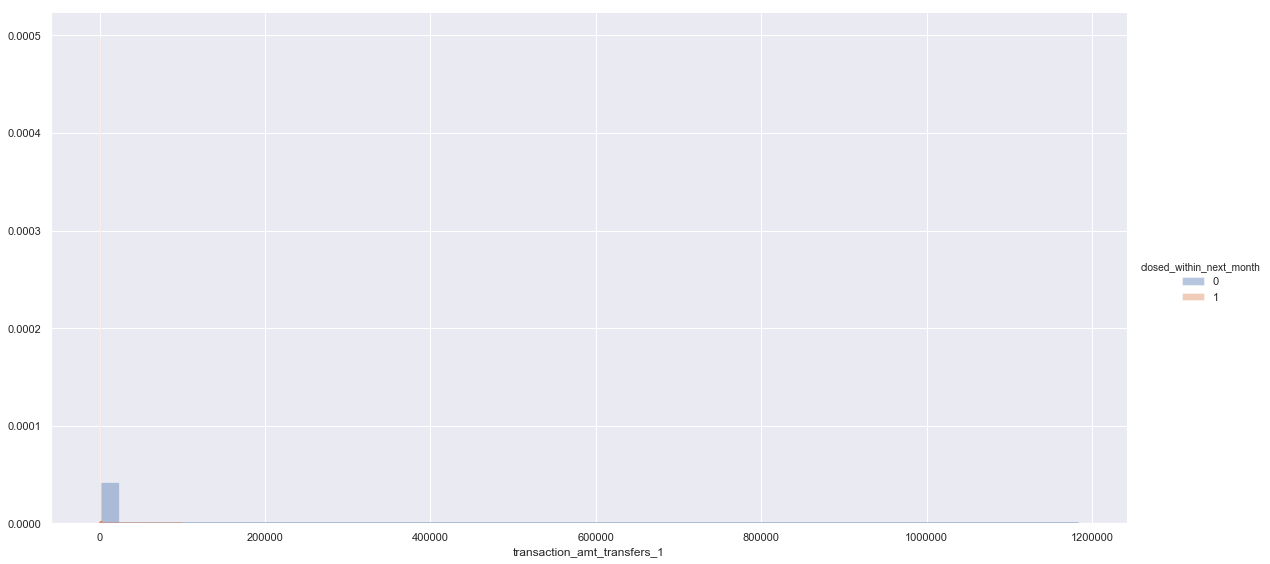

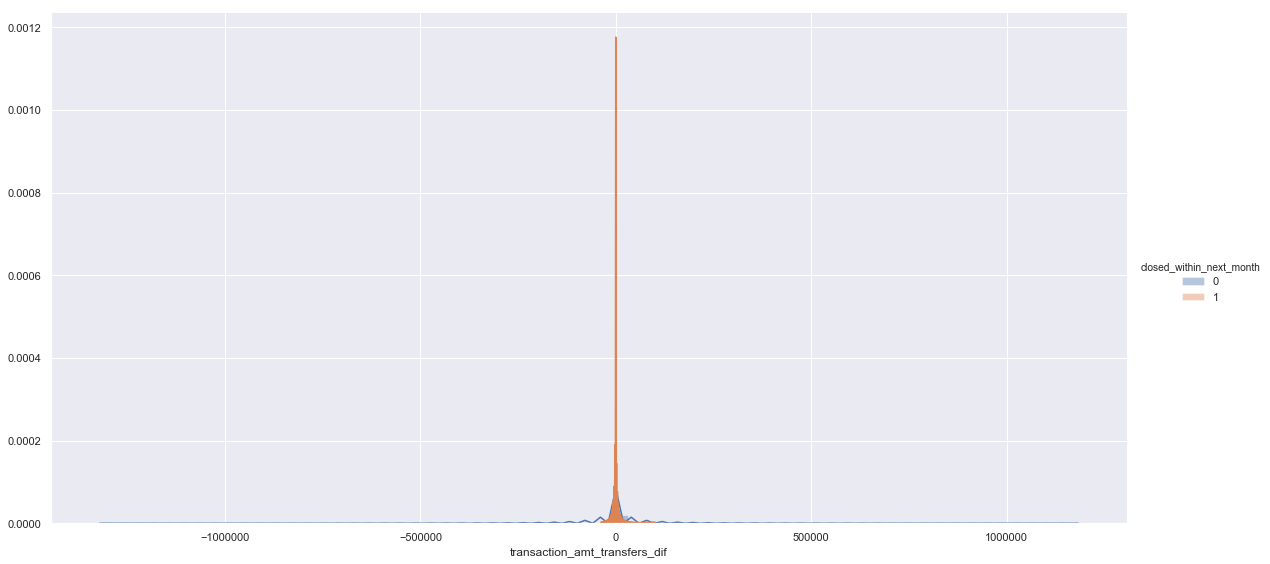

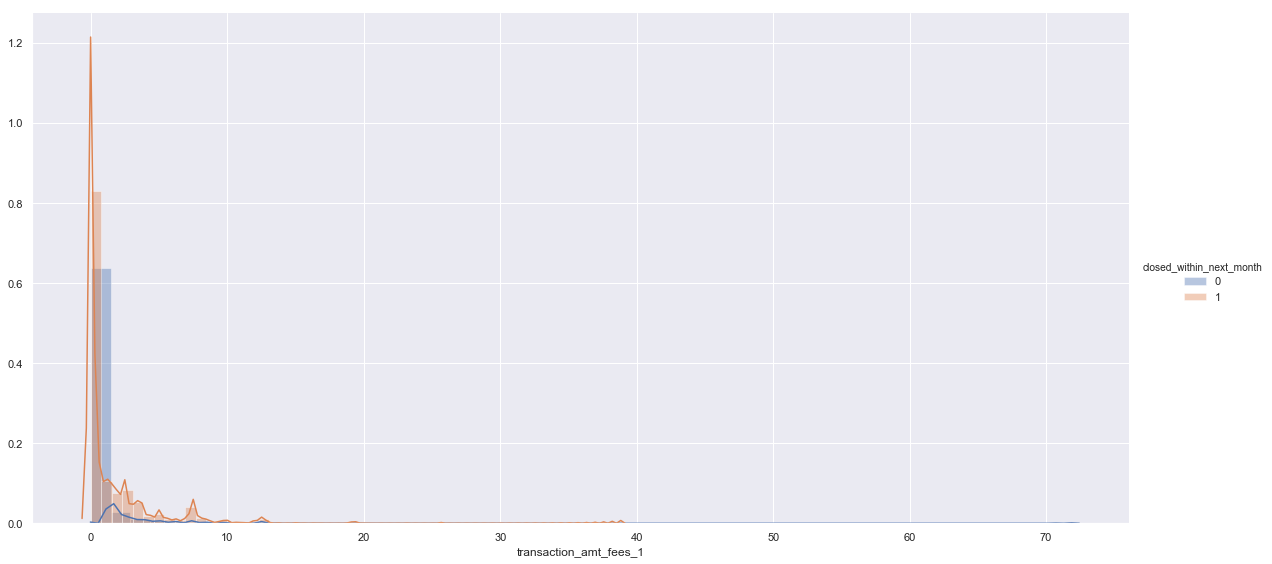

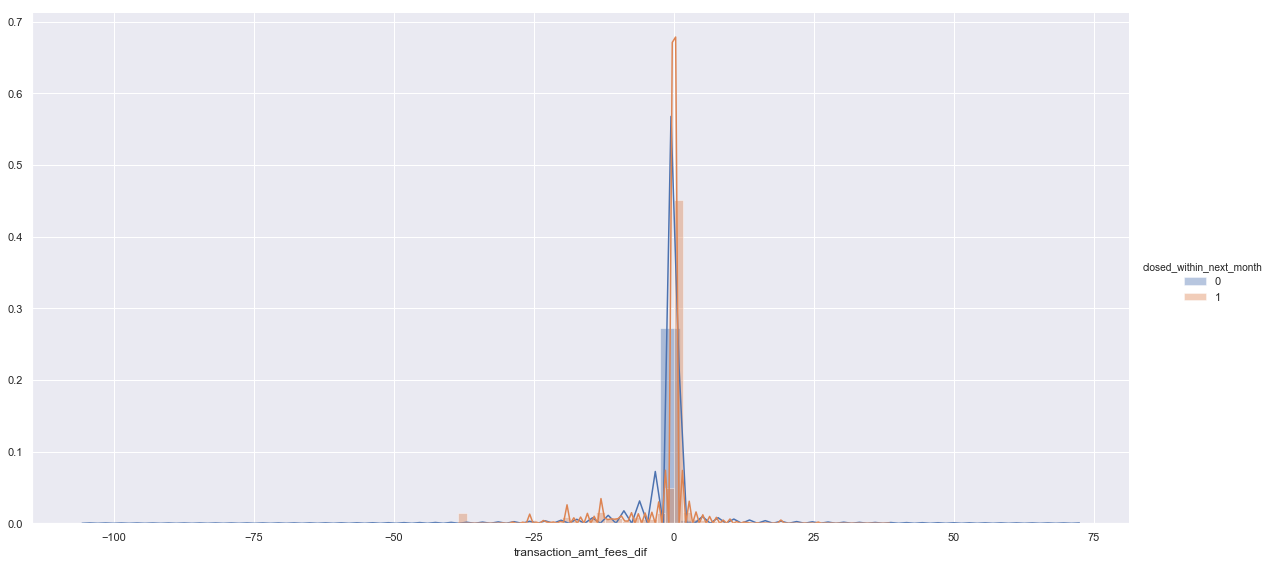

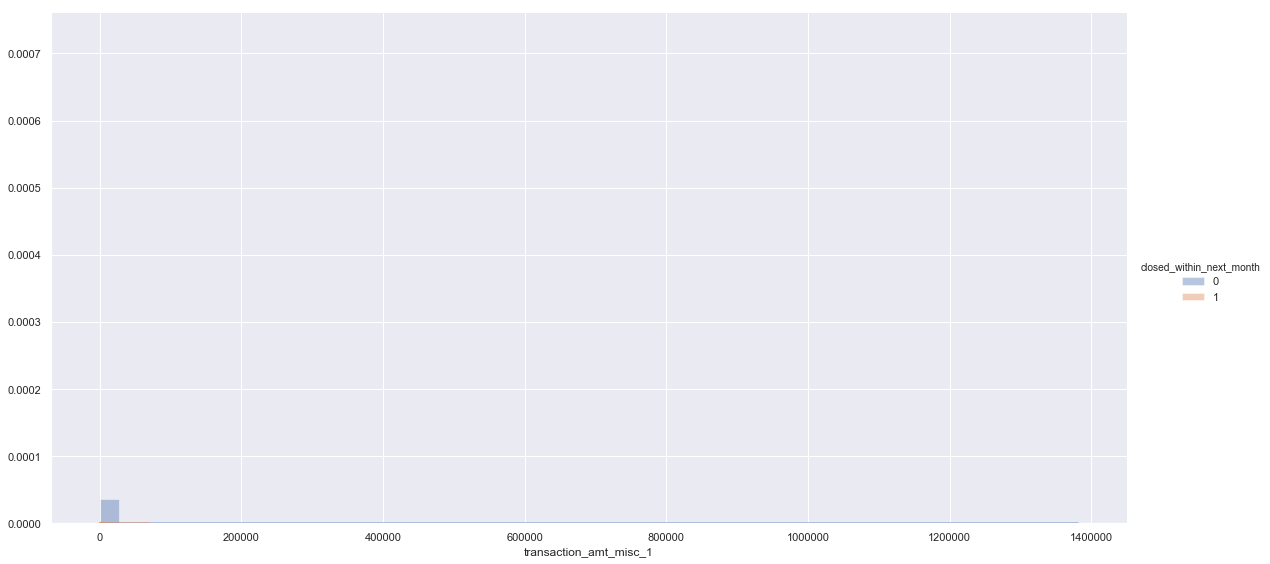

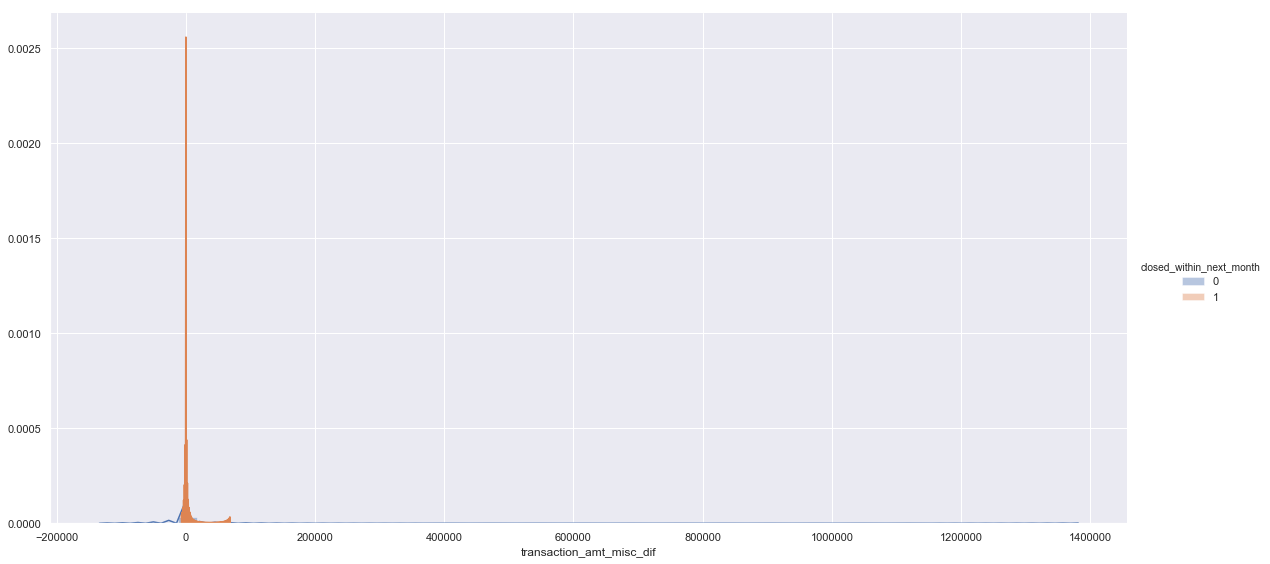

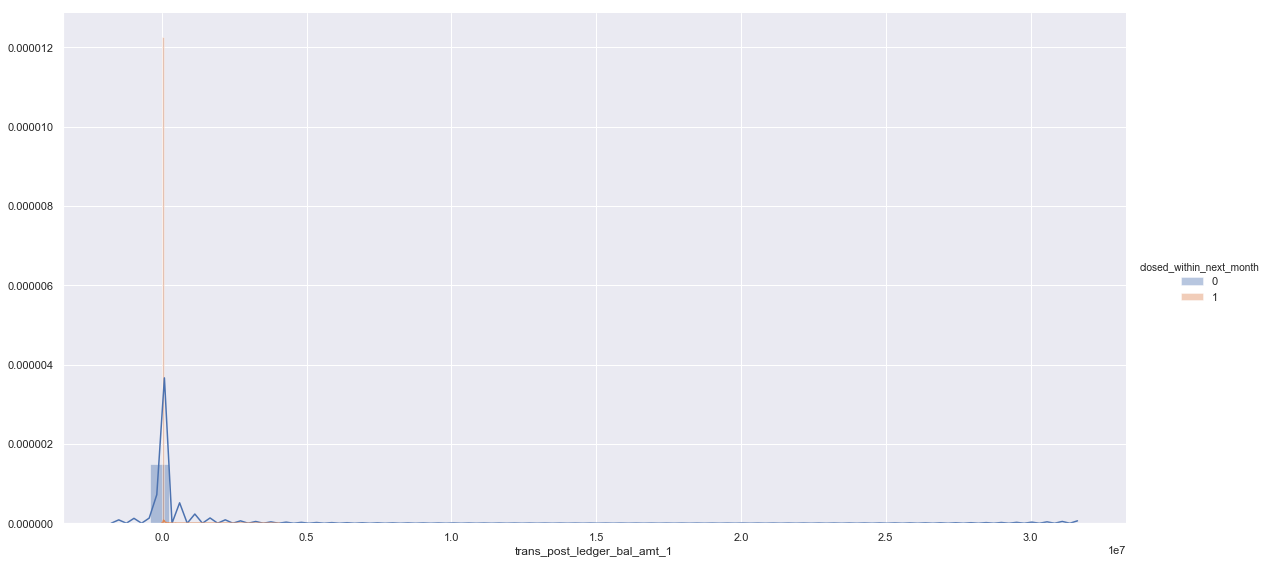

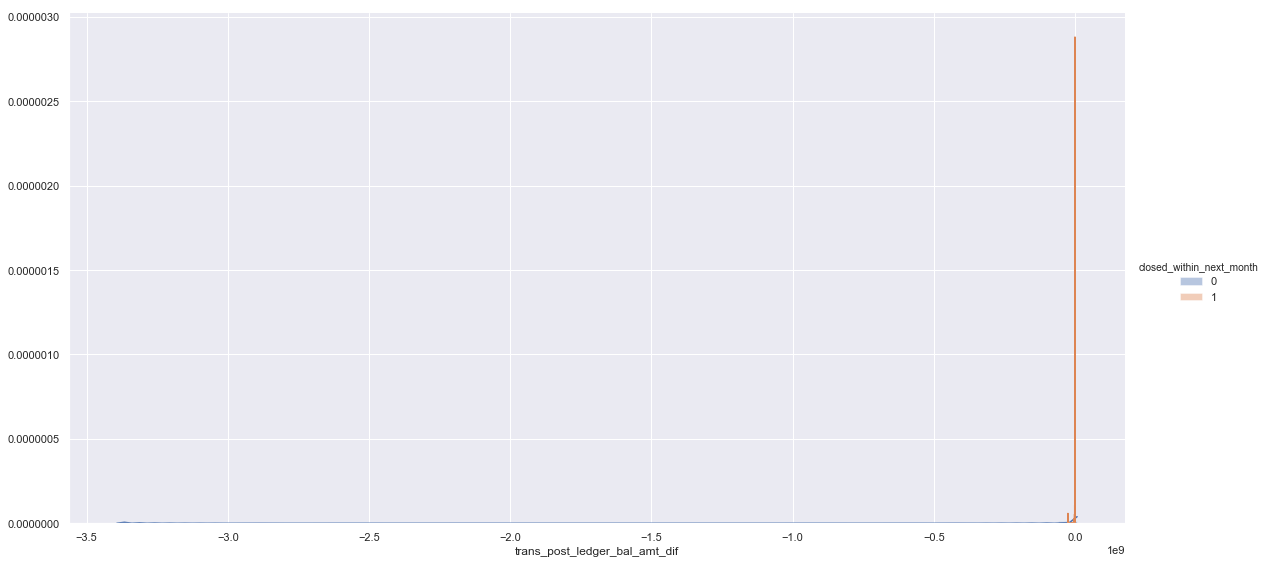

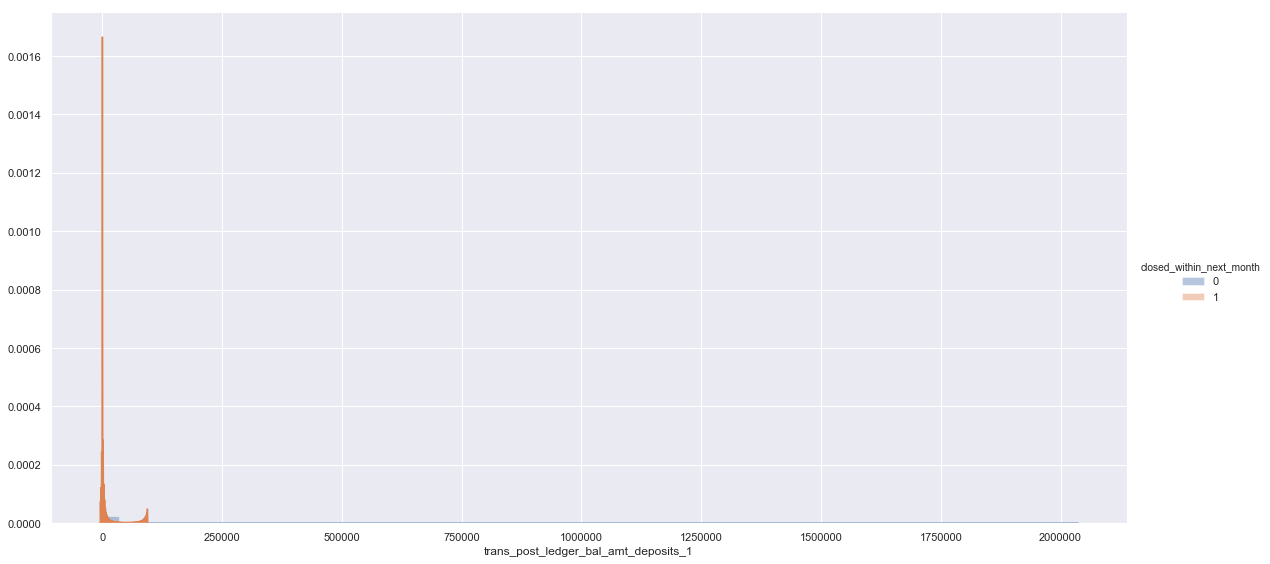

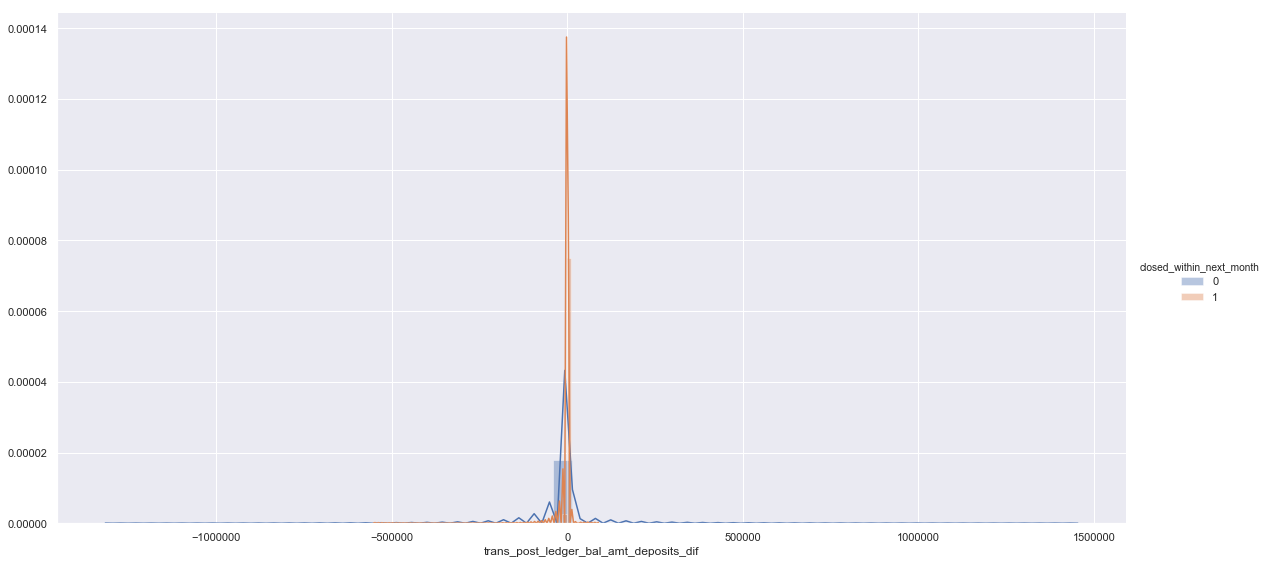

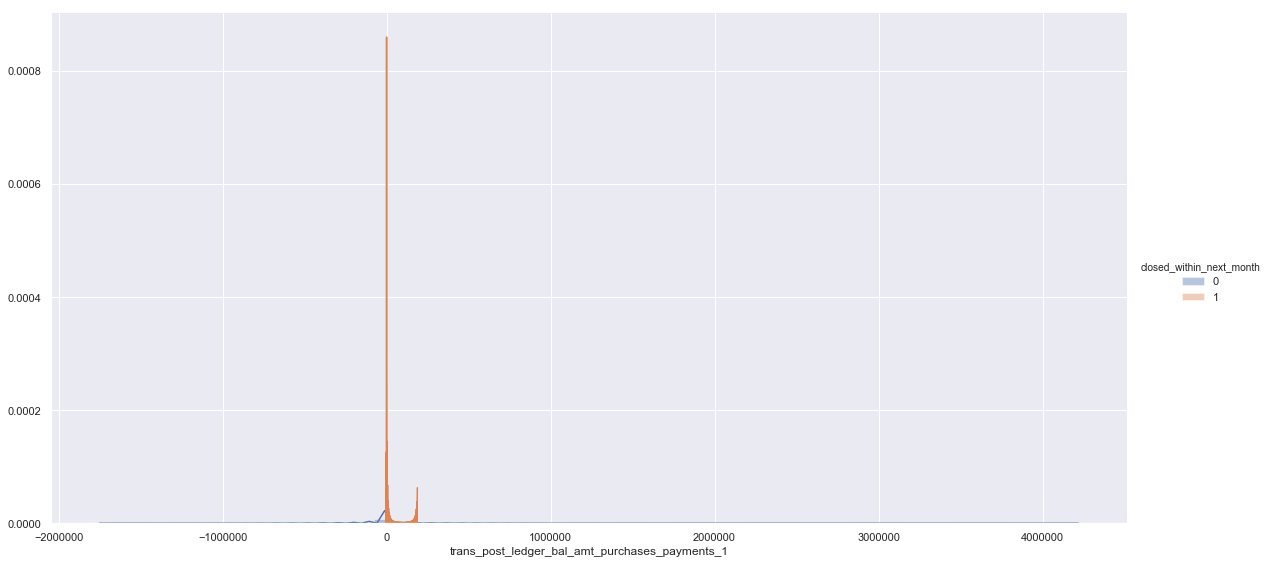

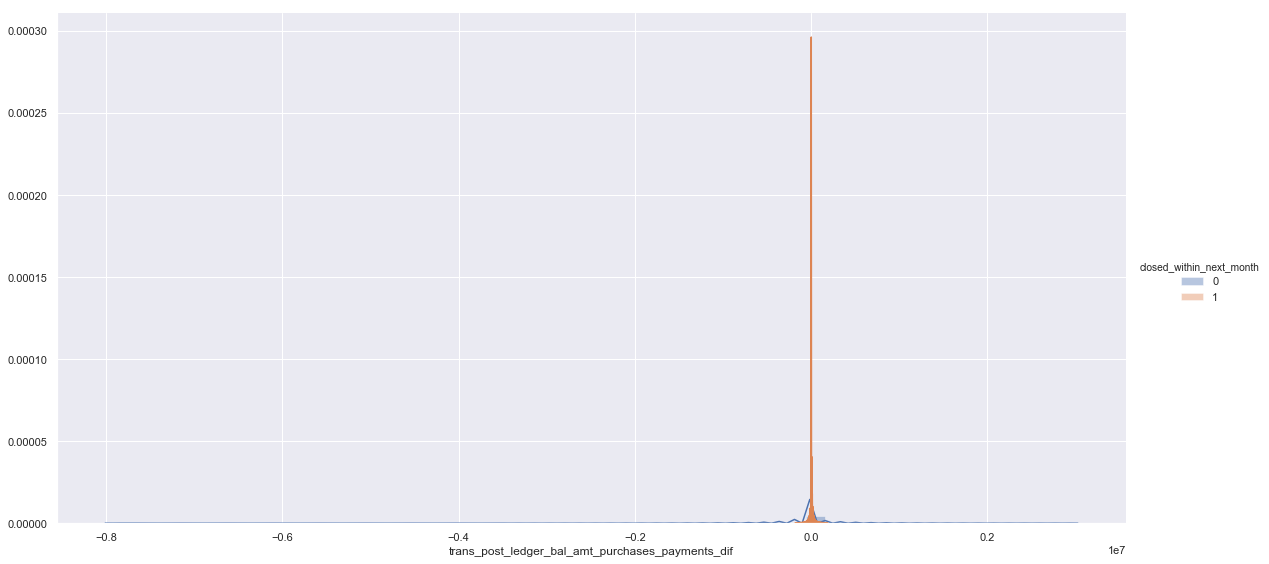

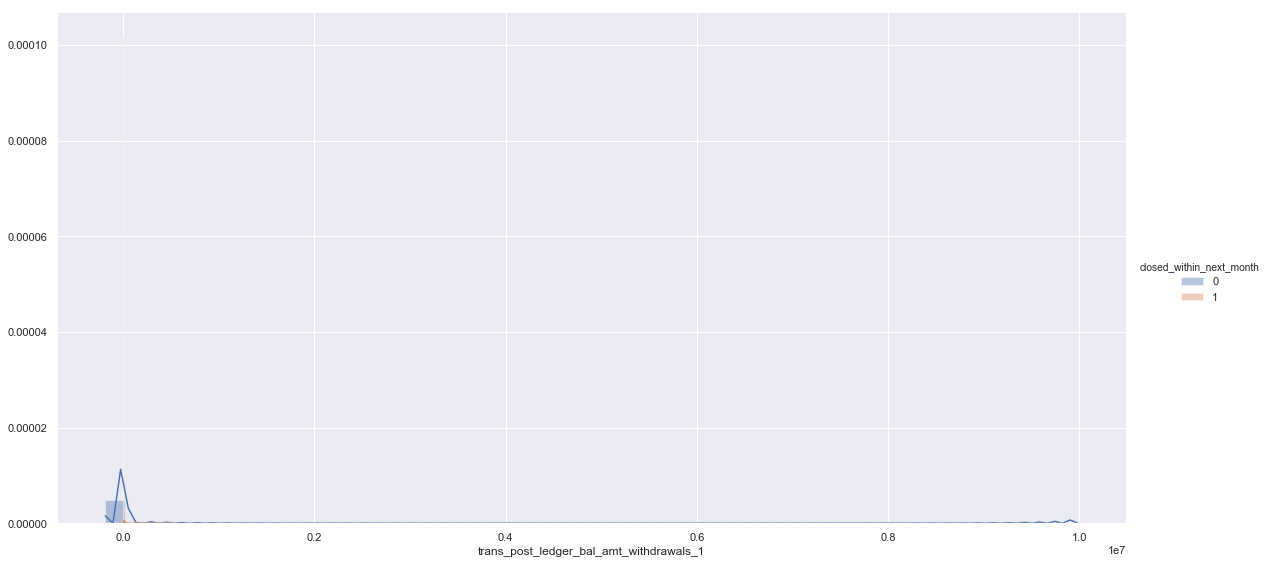

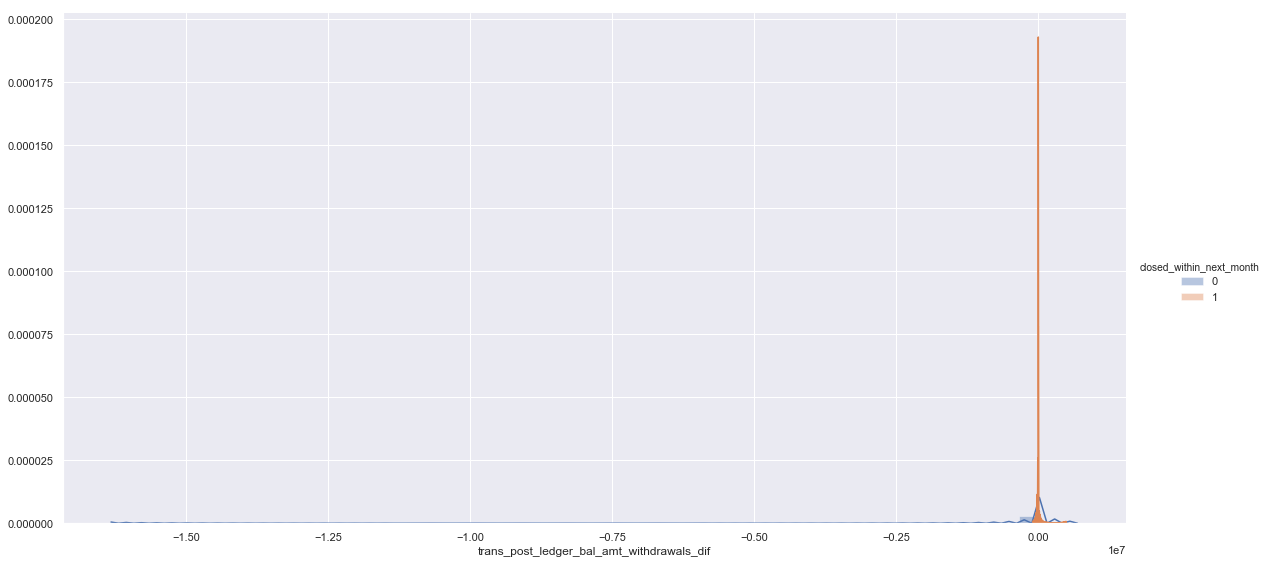

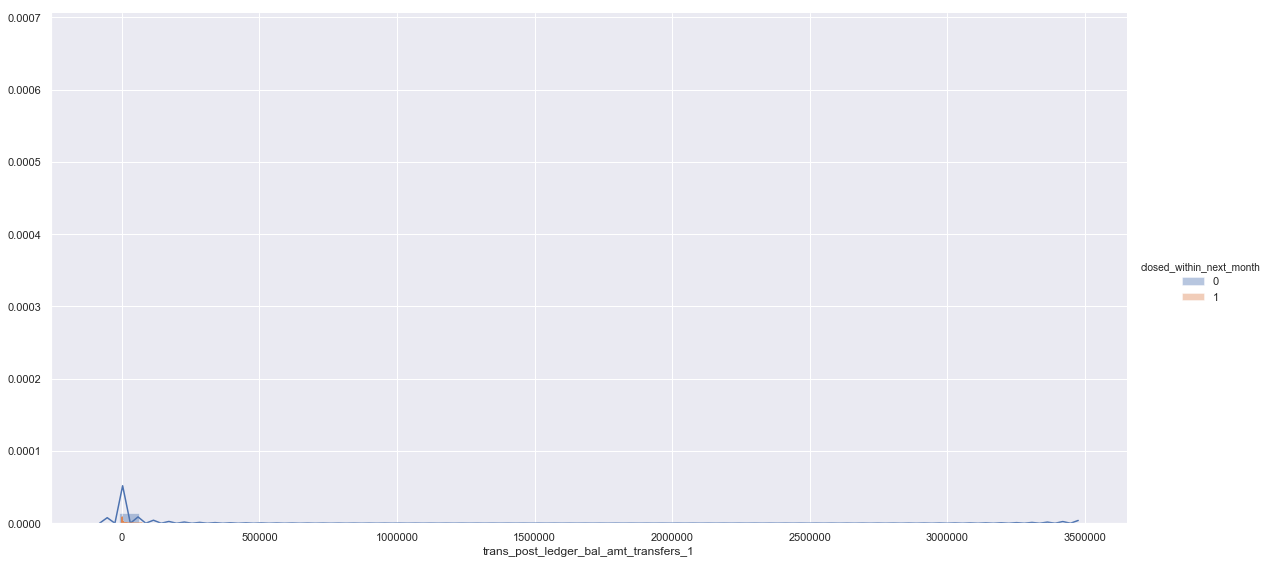

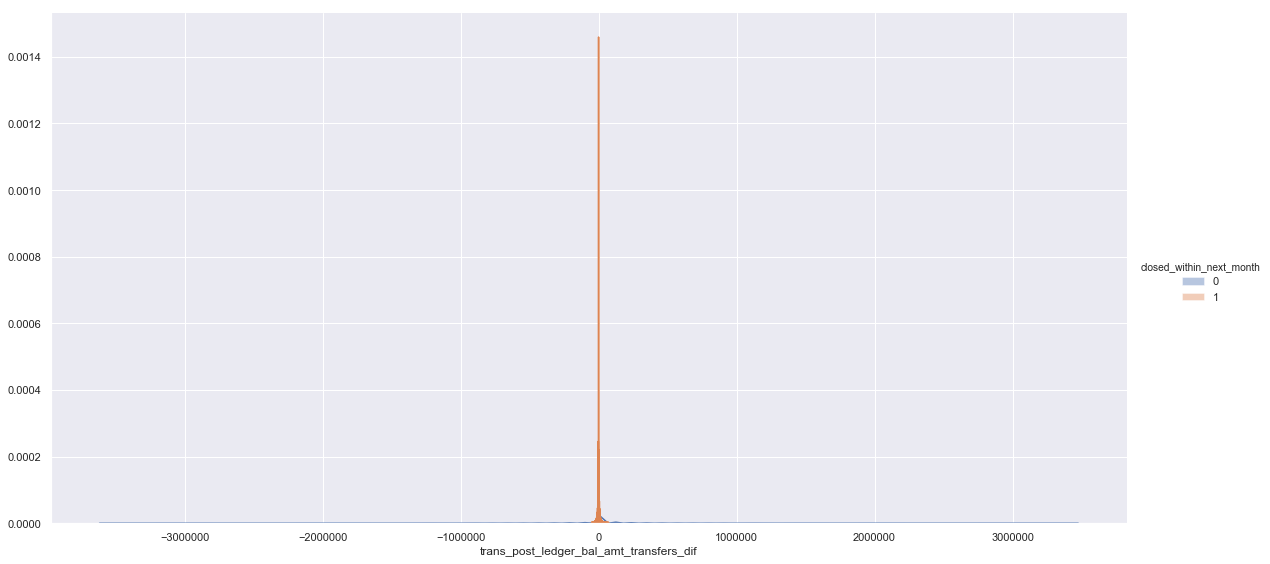

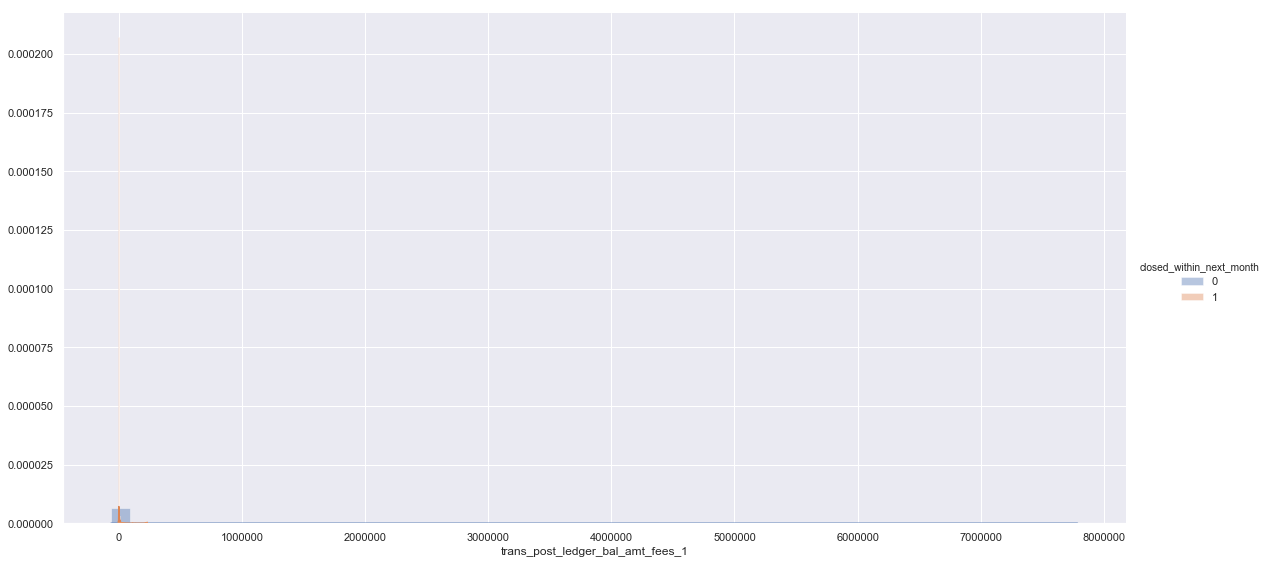

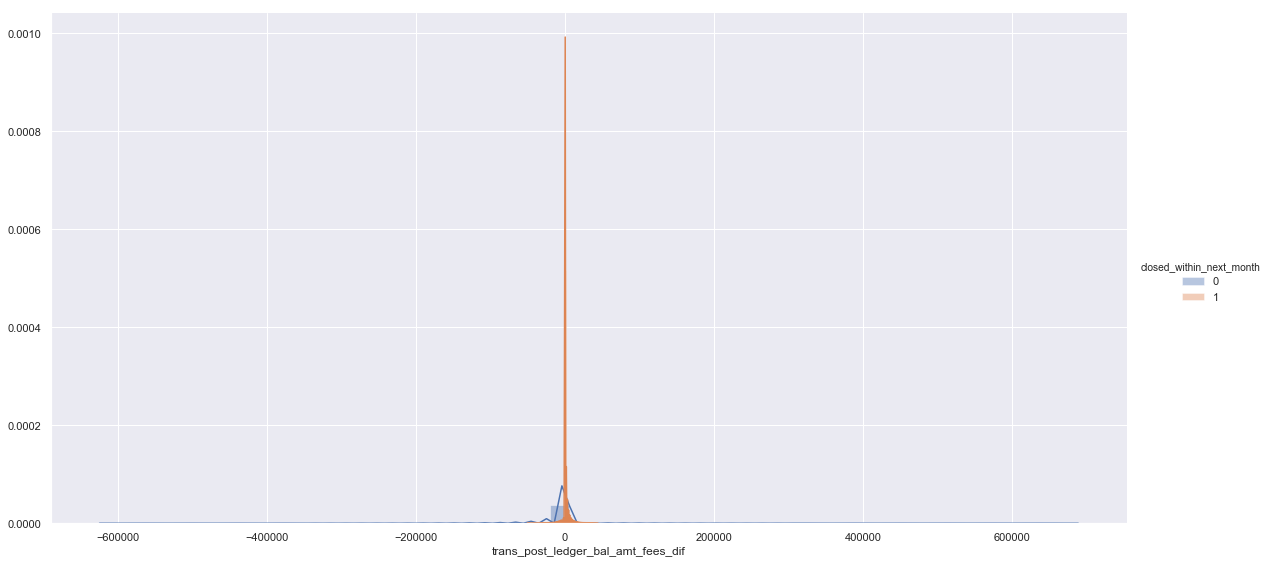

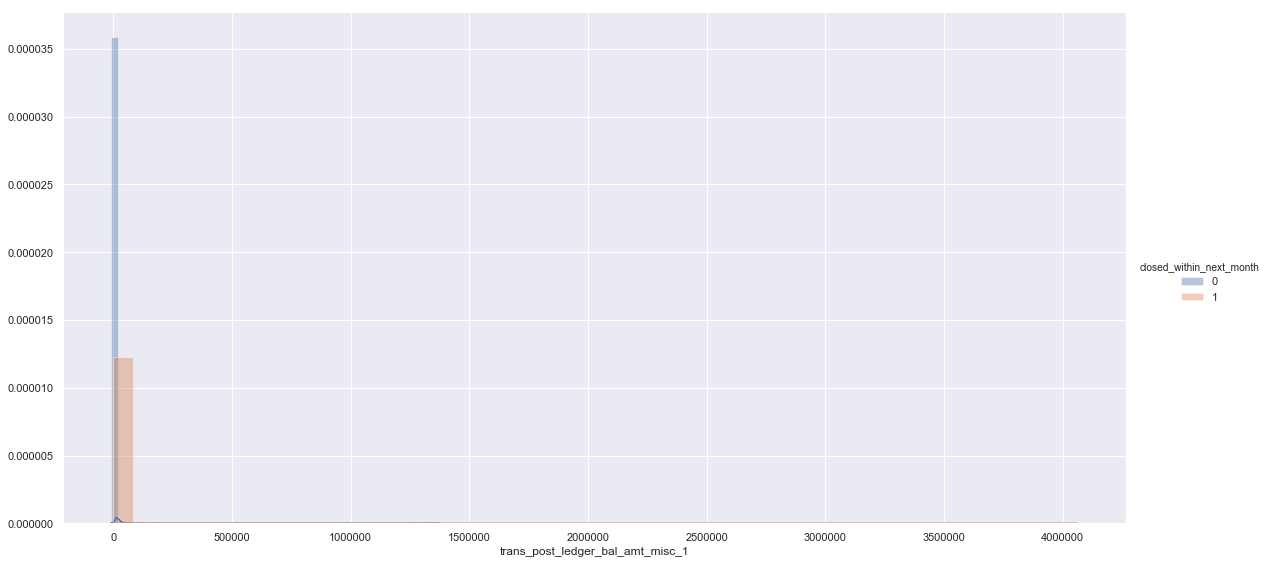

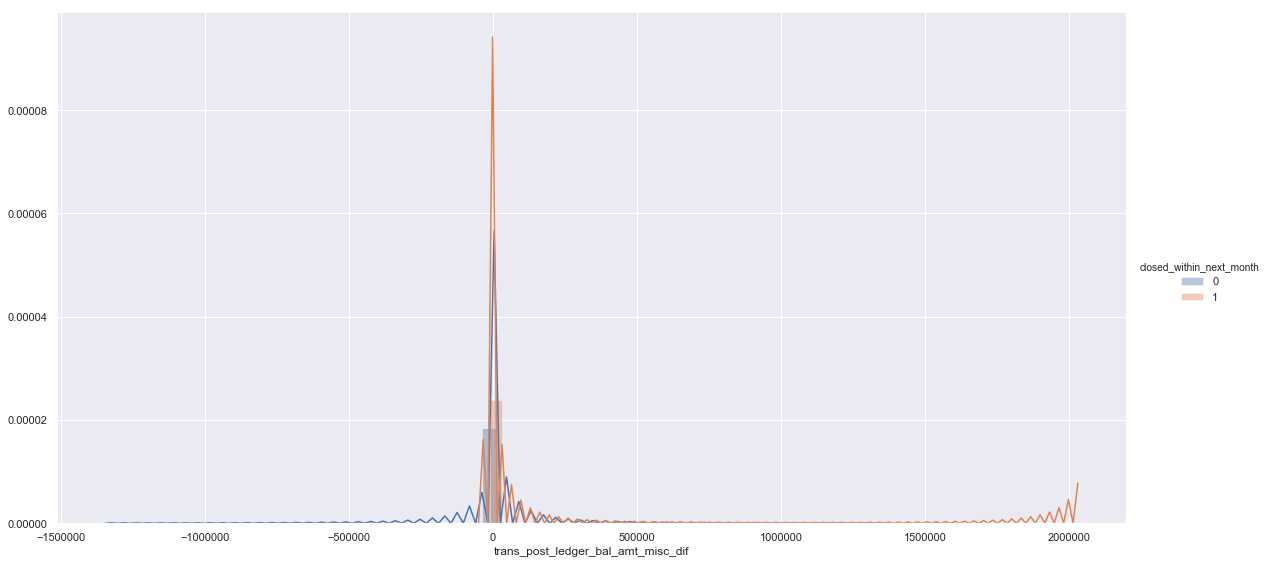

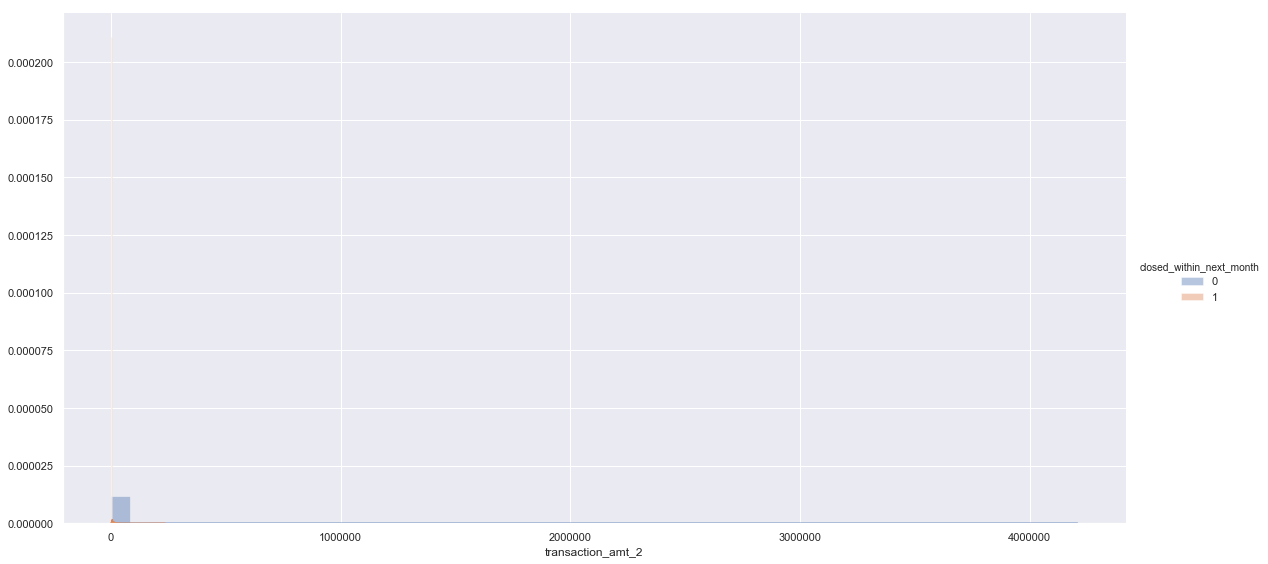

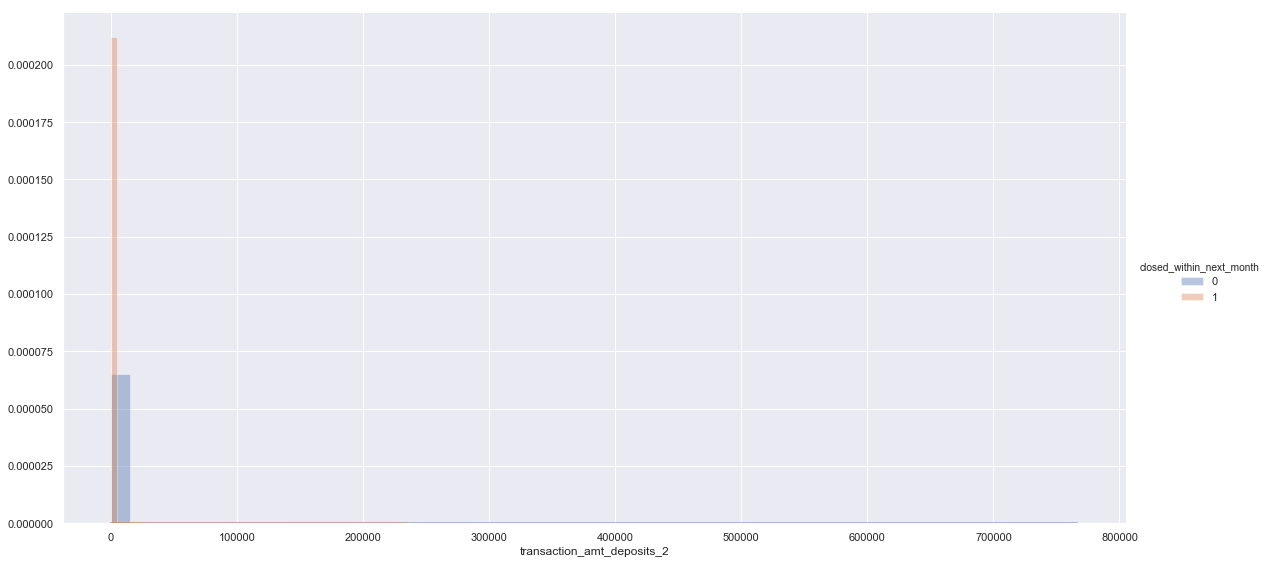

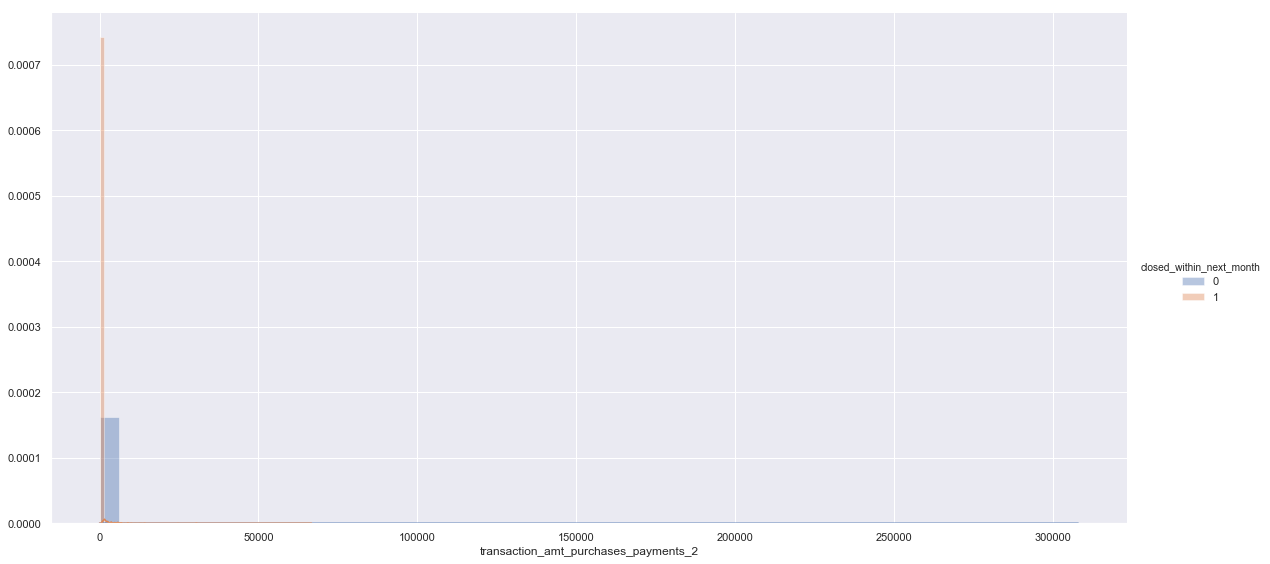

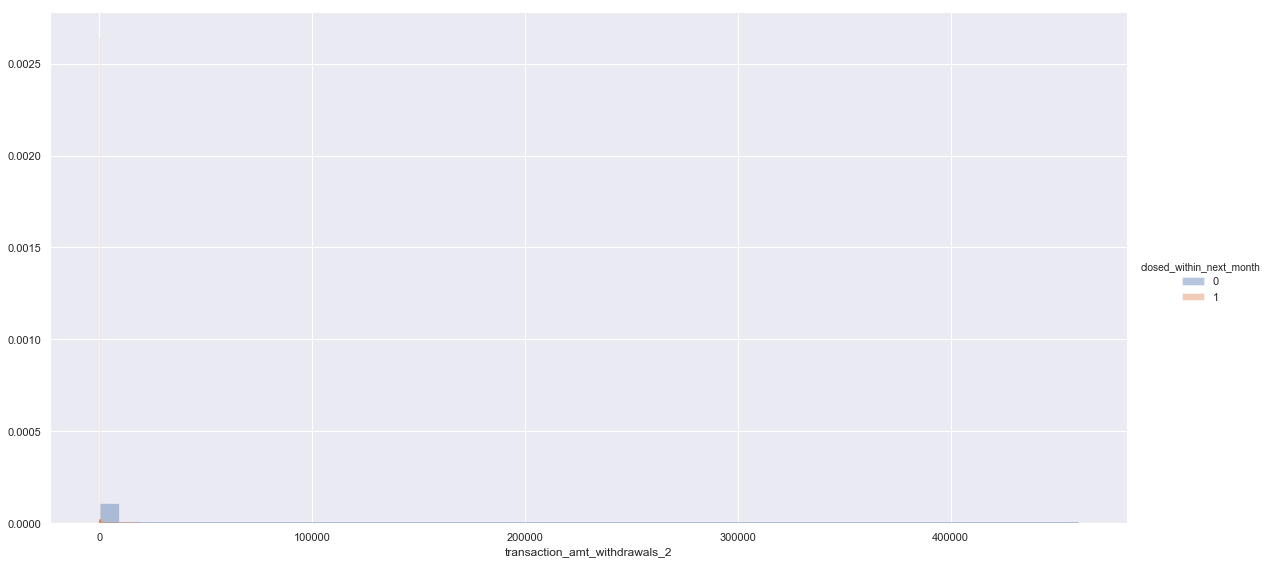

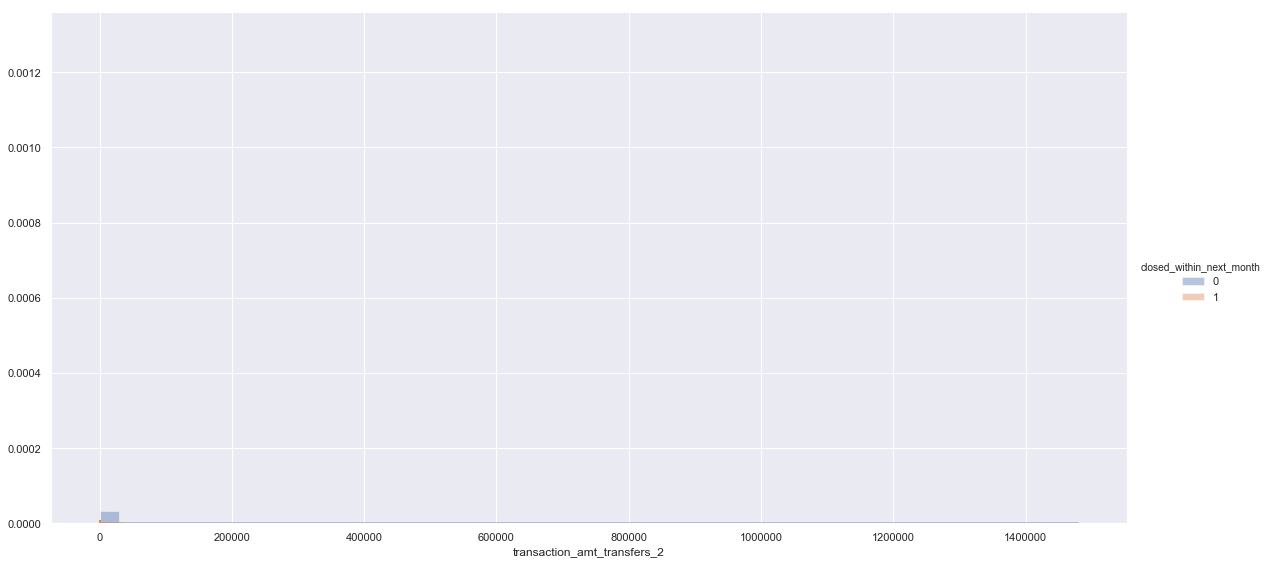

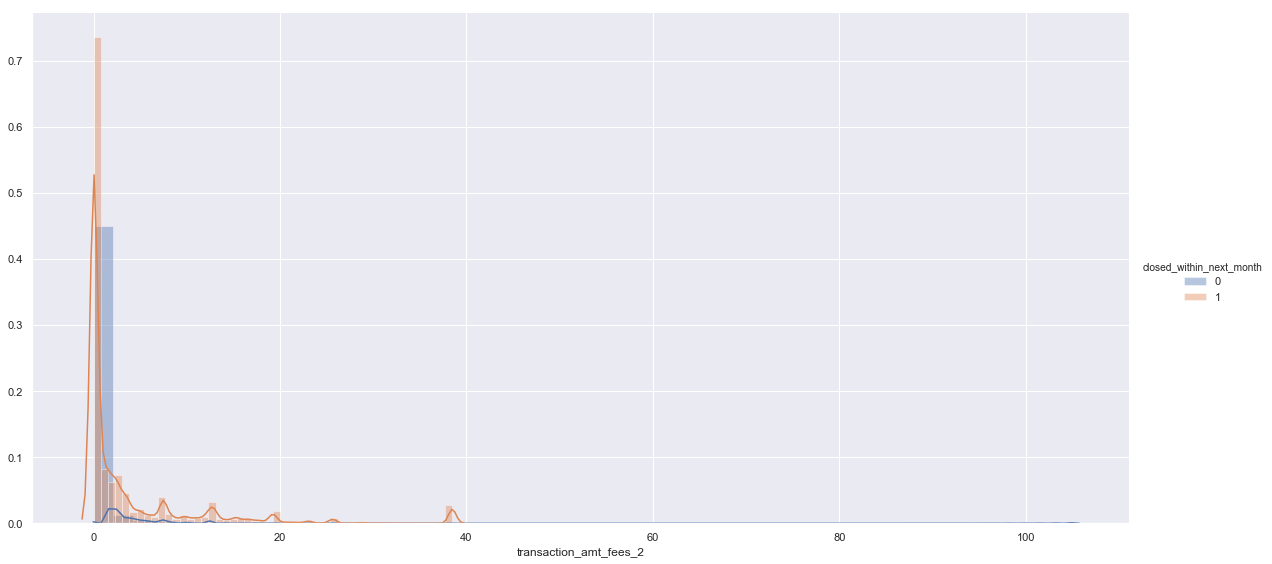

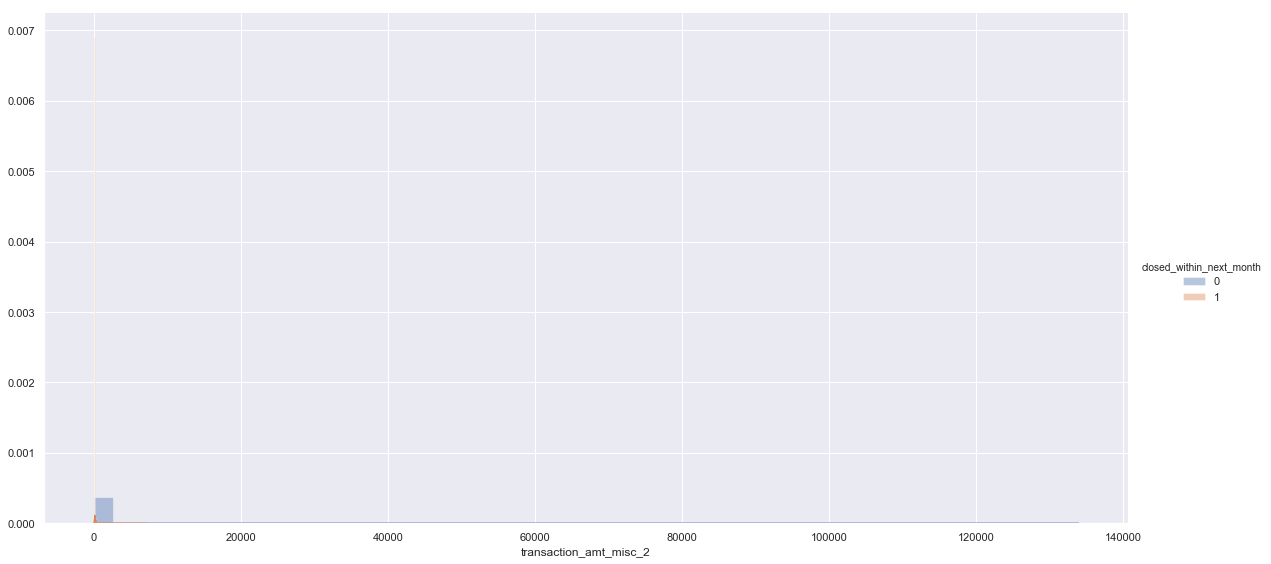

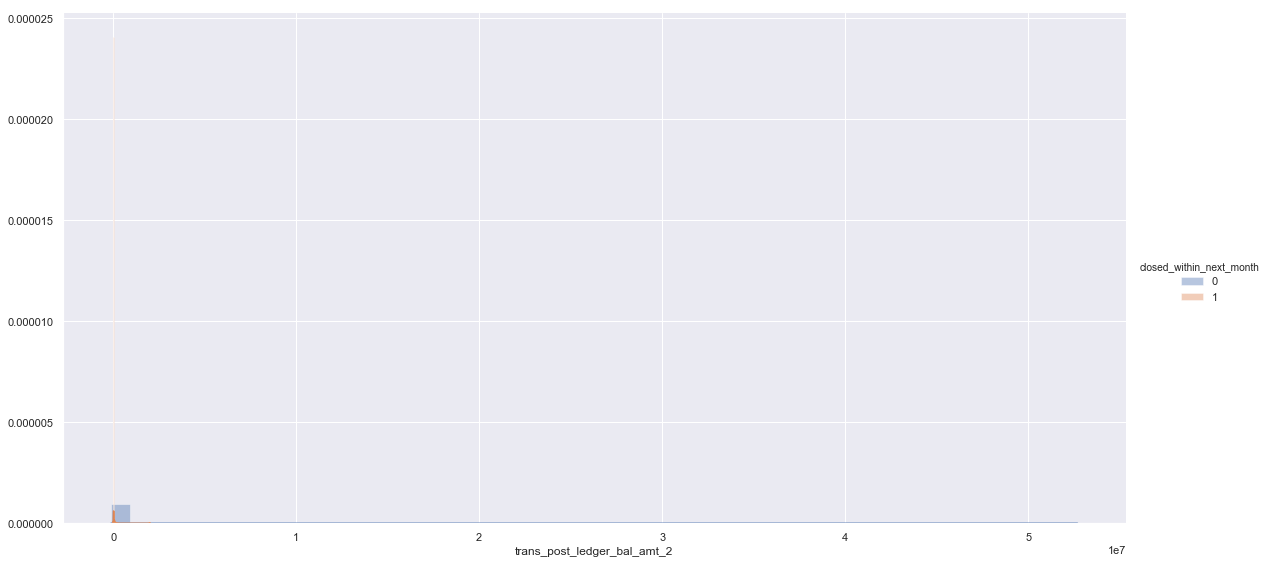

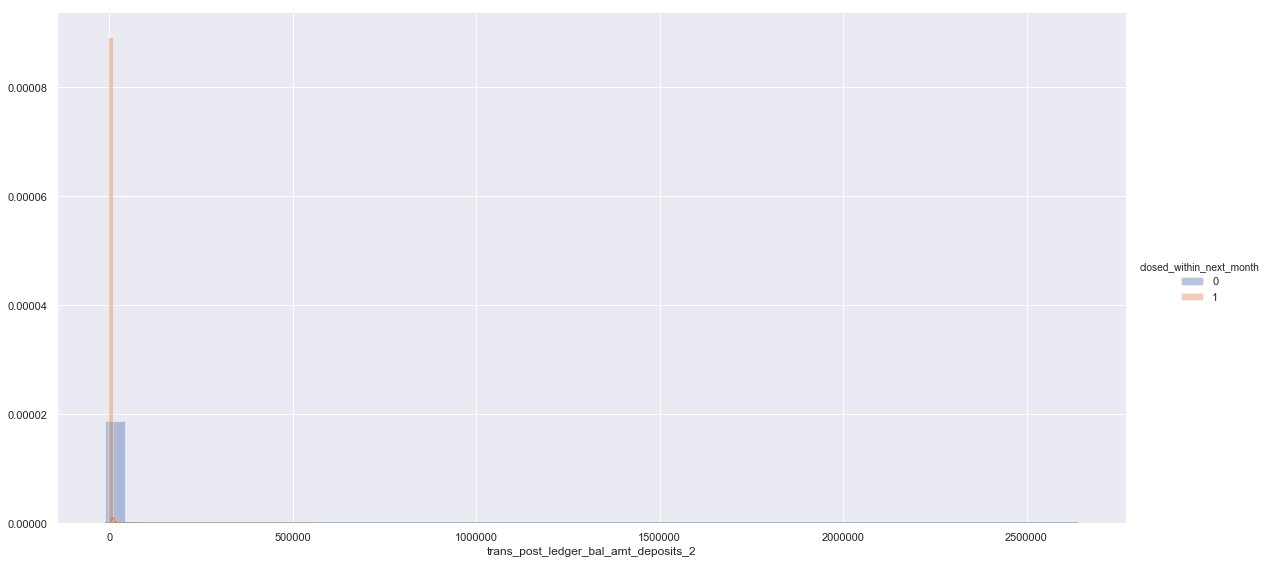

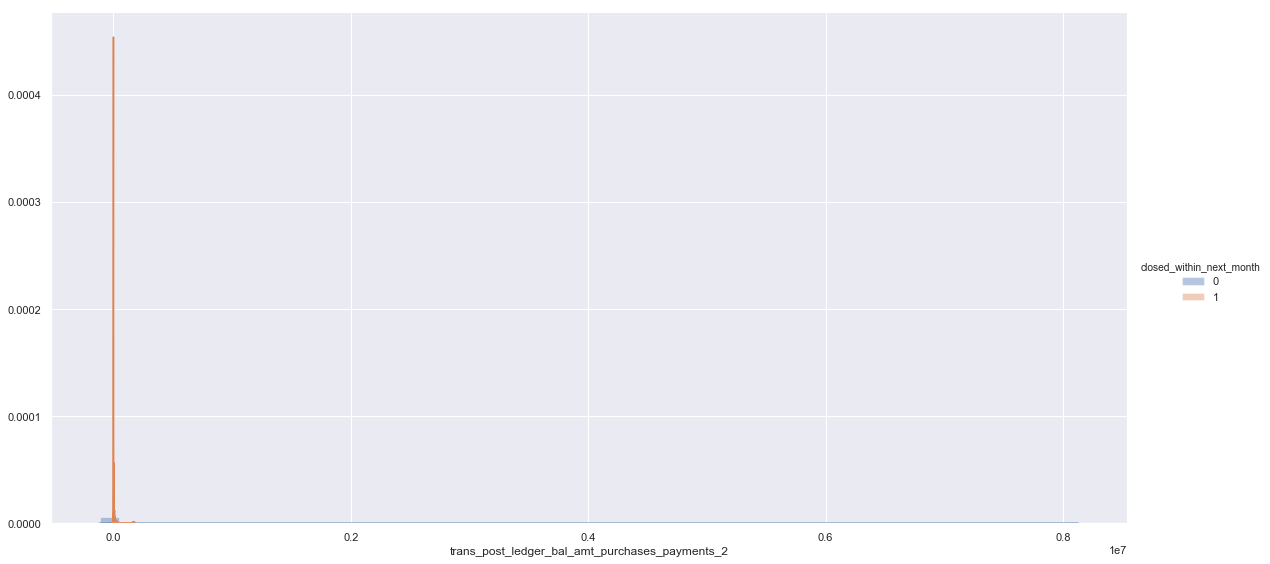

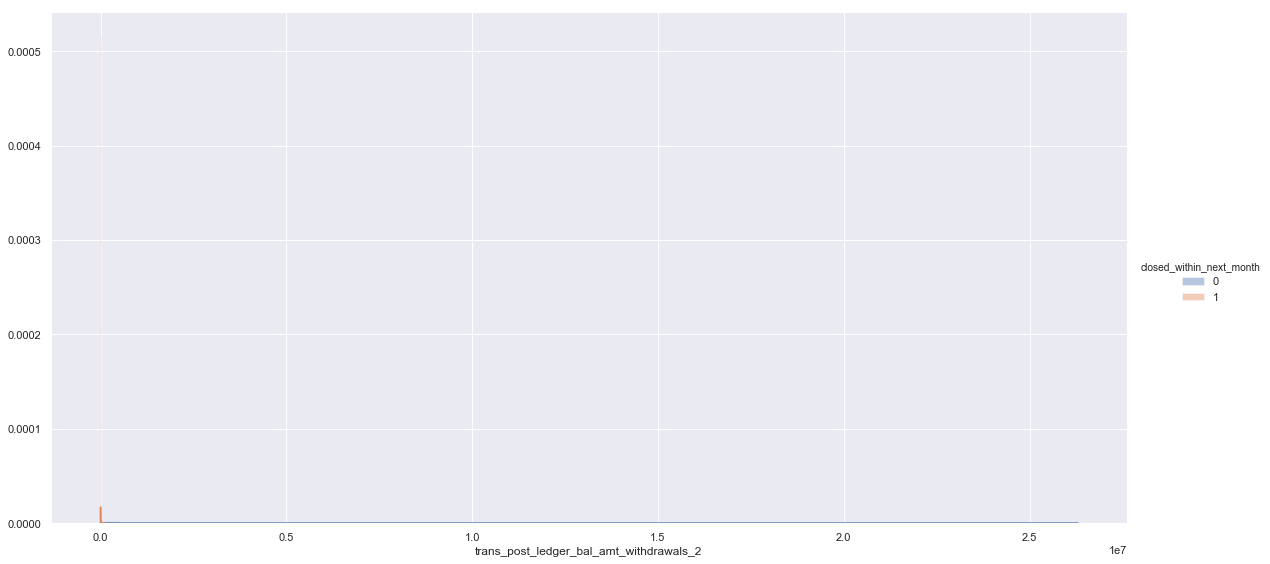

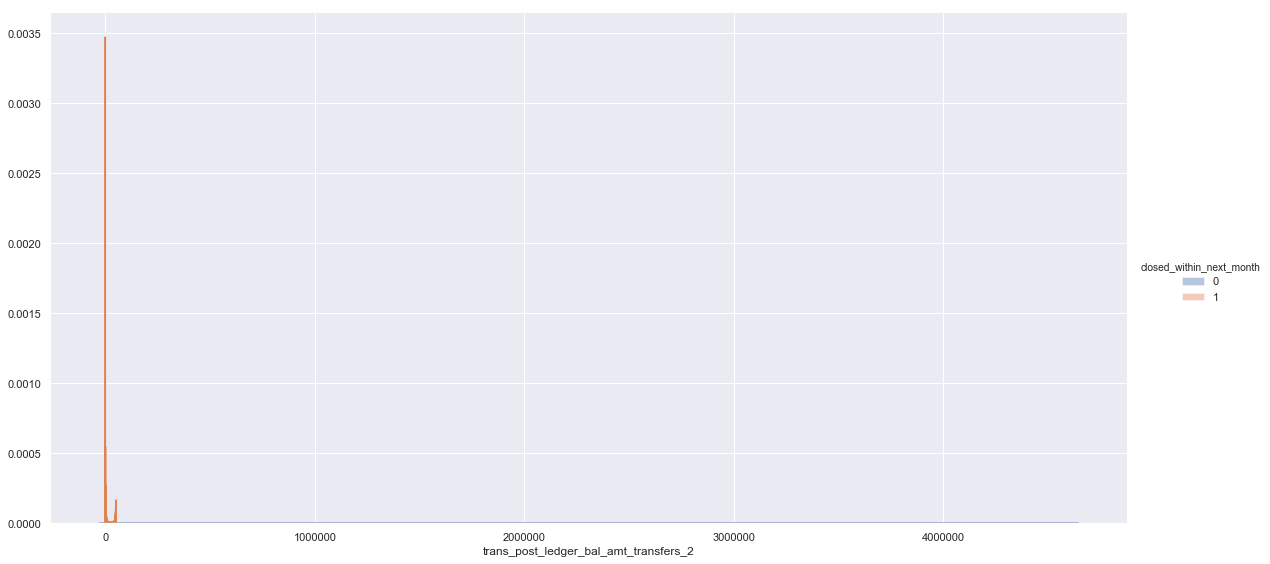

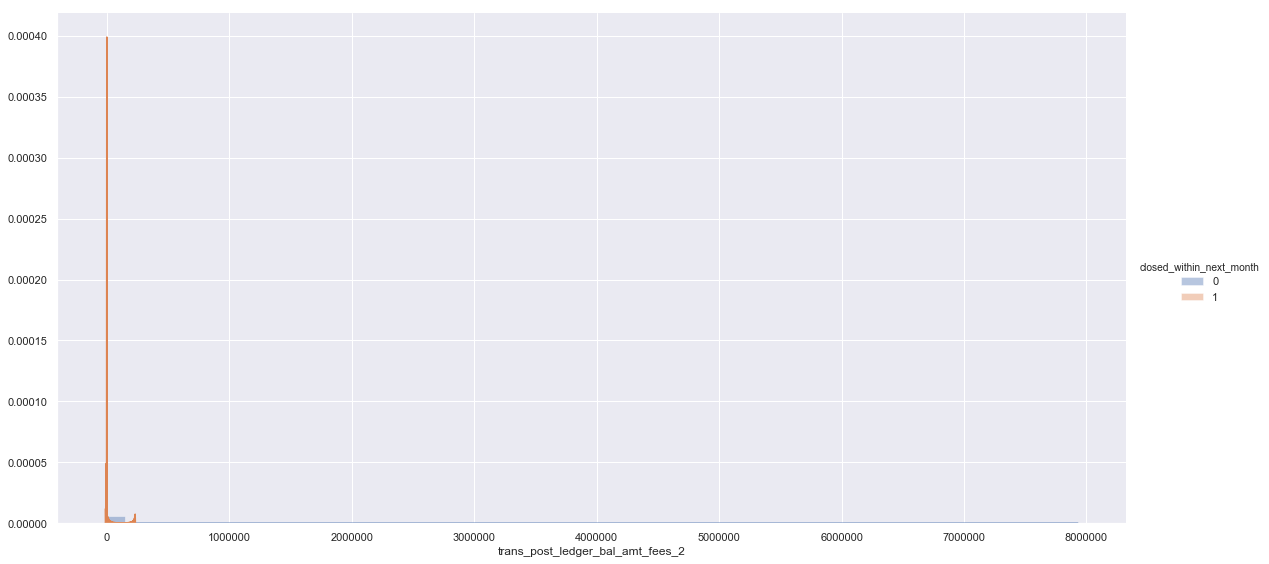

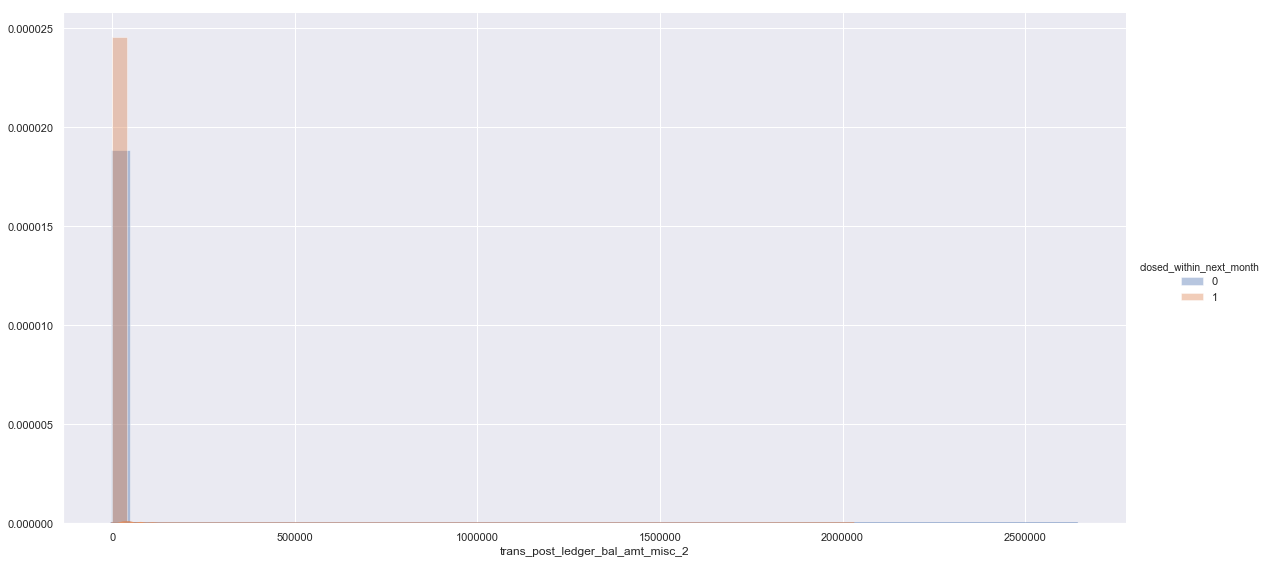

In [46]:
create_dists(dfimpalaProd, feat_cols, label_col )